In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

import sys
sys.path.append('..')
sys.path.append('../../../code')
from lib import *
plt.style.use('../../../code/peptidome.mplstyle')
from lib.plotting import model_labels as labels
import pyrepseq.plotting as prsp
import seaborn as sns

import scipy.stats

datadir = '../../../code/maxent/data'
figdatadir = './'

k=9

In [6]:
uniform_matrix =  np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k))

In [3]:
malaria_independent_params = np.load(f'{datadir}/Malaria_independent_k9_params.npz')
virus_independent_params = np.load(f'{datadir}/Humanviruses_independent_k9_params.npz')

In [4]:
human_independent_params = np.load(f'{datadir}/Human_independent_k9_params.npz')
human_independent_params

NpzFile '../../../code/maxent/data/Human_independent_k9_params.npz' with keys: f

In [5]:
malaria_shuffled_array = malaria_independent_params['f'].copy()
malaria_shuffled_again = malaria_independent_params['f'].copy()
np.random.shuffle(malaria_shuffled_array)
np.random.shuffle(malaria_shuffled_again)

In [6]:
virus_shuffled_array = virus_independent_params['f'].copy()
virus_shuffled_again = virus_independent_params['f'].copy()
np.random.shuffle(virus_shuffled_array)
np.random.shuffle(virus_shuffled_again)

In [7]:
# malaria_alt = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=malaria_independent_params['f'])


In [9]:
malaria_shuffled_matrix = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=malaria_shuffled_array)
malaria_shuffled_matrix_2 = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=malaria_shuffled_again)

virus_shuffled_matrix = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=virus_shuffled_array)
virus_shuffled_matrix_2 = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=virus_shuffled_again)

In [9]:
reference = set(count_kmers_proteome(human, k, clean=True))

In [7]:
def mat_to_dist(A, size=100000):
    sample = matrix_to_kmers(A[np.random.choice(A.shape[0], size=size, replace=False), :])
    ns = nndist_hamming_distribution(sample, reference)
    return ns

In [5]:
models = [
'Humanviruses_independent',
'Humanviruses_ncov',
'Humanviruses_nskew',
'Humanviruses_nskewfcov',
'Humanviruses_train',
'Malaria_independent',
'Malaria_ncov',
'Malaria_nskew',
'Malaria_nskewfcov',
'Malaria_train',
'Malaria_test',
'Mouse_train',
'uniform',
'Human_nskewfcov'
]

In [6]:
ns_dict = {}
ps_dict = {}
for model in models:
    df = pd.read_csv(f'{datadir}/{model}_distance_to_self_no_sampling.csv',names=['0', '1', '2', '3+'])
    ns_dict[model] = np.array(df.loc['N'].values)
    ps_dict[model] = np.array(df.loc['P'].values)

In [7]:
ns_dict

{'Humanviruses_independent': array([np.float64(47.0), np.float64(6821.0), np.float64(226363.0),
        '293043.0'], dtype=object),
 'Humanviruses_ncov': array([np.float64(170.0), np.float64(11050.0), np.float64(243459.0),
        '271585.0'], dtype=object),
 'Humanviruses_nskew': array([np.float64(385.0), np.float64(13359.0), np.float64(244268.0),
        '268252.0'], dtype=object),
 'Humanviruses_nskewfcov': array([np.float64(394.0), np.float64(13802.0), np.float64(247028.0),
        '265040.0'], dtype=object),
 'Humanviruses_train': array([np.float64(859.0), np.float64(15314.0), np.float64(250262.0),
        '259839.0'], dtype=object),
 'Malaria_independent': array([np.float64(121.0), np.float64(15505.0), np.float64(654969.0),
        '1275306.0'], dtype=object),
 'Malaria_ncov': array([np.float64(375.0), np.float64(24885.0), np.float64(724394.0),
        '1240678.0'], dtype=object),
 'Malaria_nskew': array([np.float64(1346.0), np.float64(30316.0), np.float64(717870.0),
        '119

In [10]:
# ns_dict['uniform'] = mat_to_dist(uniform_matrix)
# ps_dict['uniform'] = ns_dict['uniform']/np.sum(ns_dict['uniform'])
ps_dict['uniform'][0] = len(reference)/20**k

In [ ]:
# ns_dict['malaria_alt'] = mat_to_dist(malaria_alt)
# ps_dict['malaria_alt'] = ns_dict['malaria_alt']/np.sum(ns_dict['malaria_alt'])

In [16]:
ns_dict['virus_shuffled_independent'] = mat_to_dist(virus_shuffled_matrix)
ps_dict['virus_shuffled_independent'] = ns_dict['virus_shuffled_independent']/np.sum(ns_dict['virus_shuffled_independent'])

ns_dict['virus_shuffled_independent2'] = mat_to_dist(virus_shuffled_matrix_2)
ps_dict['virus_shuffled_independent2'] = ns_dict['virus_shuffled_independent2']/np.sum(ns_dict['virus_shuffled_independent2'])

In [17]:
ns_dict['malaria_shuffled_independent'] = mat_to_dist(malaria_shuffled_matrix)
ps_dict['malaria_shuffled_independent'] = ns_dict['malaria_shuffled_independent']/np.sum(ns_dict['malaria_shuffled_independent'])

ns_dict['malaria_shuffled_independent2'] = mat_to_dist(malaria_shuffled_matrix_2)
ps_dict['malaria_shuffled_independent2'] = ns_dict['malaria_shuffled_independent2']/np.sum(ns_dict['malaria_shuffled_independent2'])

In [20]:
freq_df = pd.DataFrame(data=[
    human_independent_params['f'],
    malaria_independent_params['f'].copy(),
    virus_independent_params['f'].copy(),
    malaria_shuffled_array,
    virus_shuffled_array
    ],columns=list(aminoacids),index=['Human','Malaria','Virus','Malaria Shuffled', 'Virus Shuffled'])
freq_df

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Human,0.070007,0.022634,0.047581,0.071195,0.036642,0.065987,0.026254,0.043760,0.057332,0.099802,0.019796,0.035951,0.063270,0.047685,0.056445,0.083281,0.053331,0.060251,0.012148,0.026649
Malaria,0.019618,0.017968,0.063957,0.070856,0.044345,0.028318,0.024240,0.093673,0.118140,0.077035,0.020677,0.141612,0.019698,0.027805,0.026556,0.064407,0.040829,0.037535,0.004909,0.057823
Virus,0.077774,0.023660,0.050071,0.054126,0.038742,0.062523,0.025116,0.051574,0.047460,0.095090,0.019752,0.041658,0.061661,0.034560,0.065769,0.075220,0.063620,0.066281,0.013112,0.032231
Malaria Shuffled,0.064407,0.044345,0.040829,0.026556,0.141612,0.063957,0.027805,0.037535,0.019618,0.020677,0.118140,0.028318,0.077035,0.093673,0.017968,0.019698,0.024240,0.004909,0.070856,0.057823
Virus Shuffled,0.025116,0.063620,0.019752,0.054126,0.077774,0.047460,0.023660,0.065769,0.041658,0.051574,0.050071,0.066281,0.013112,0.095090,0.038742,0.034560,0.062523,0.032231,0.061661,0.075220


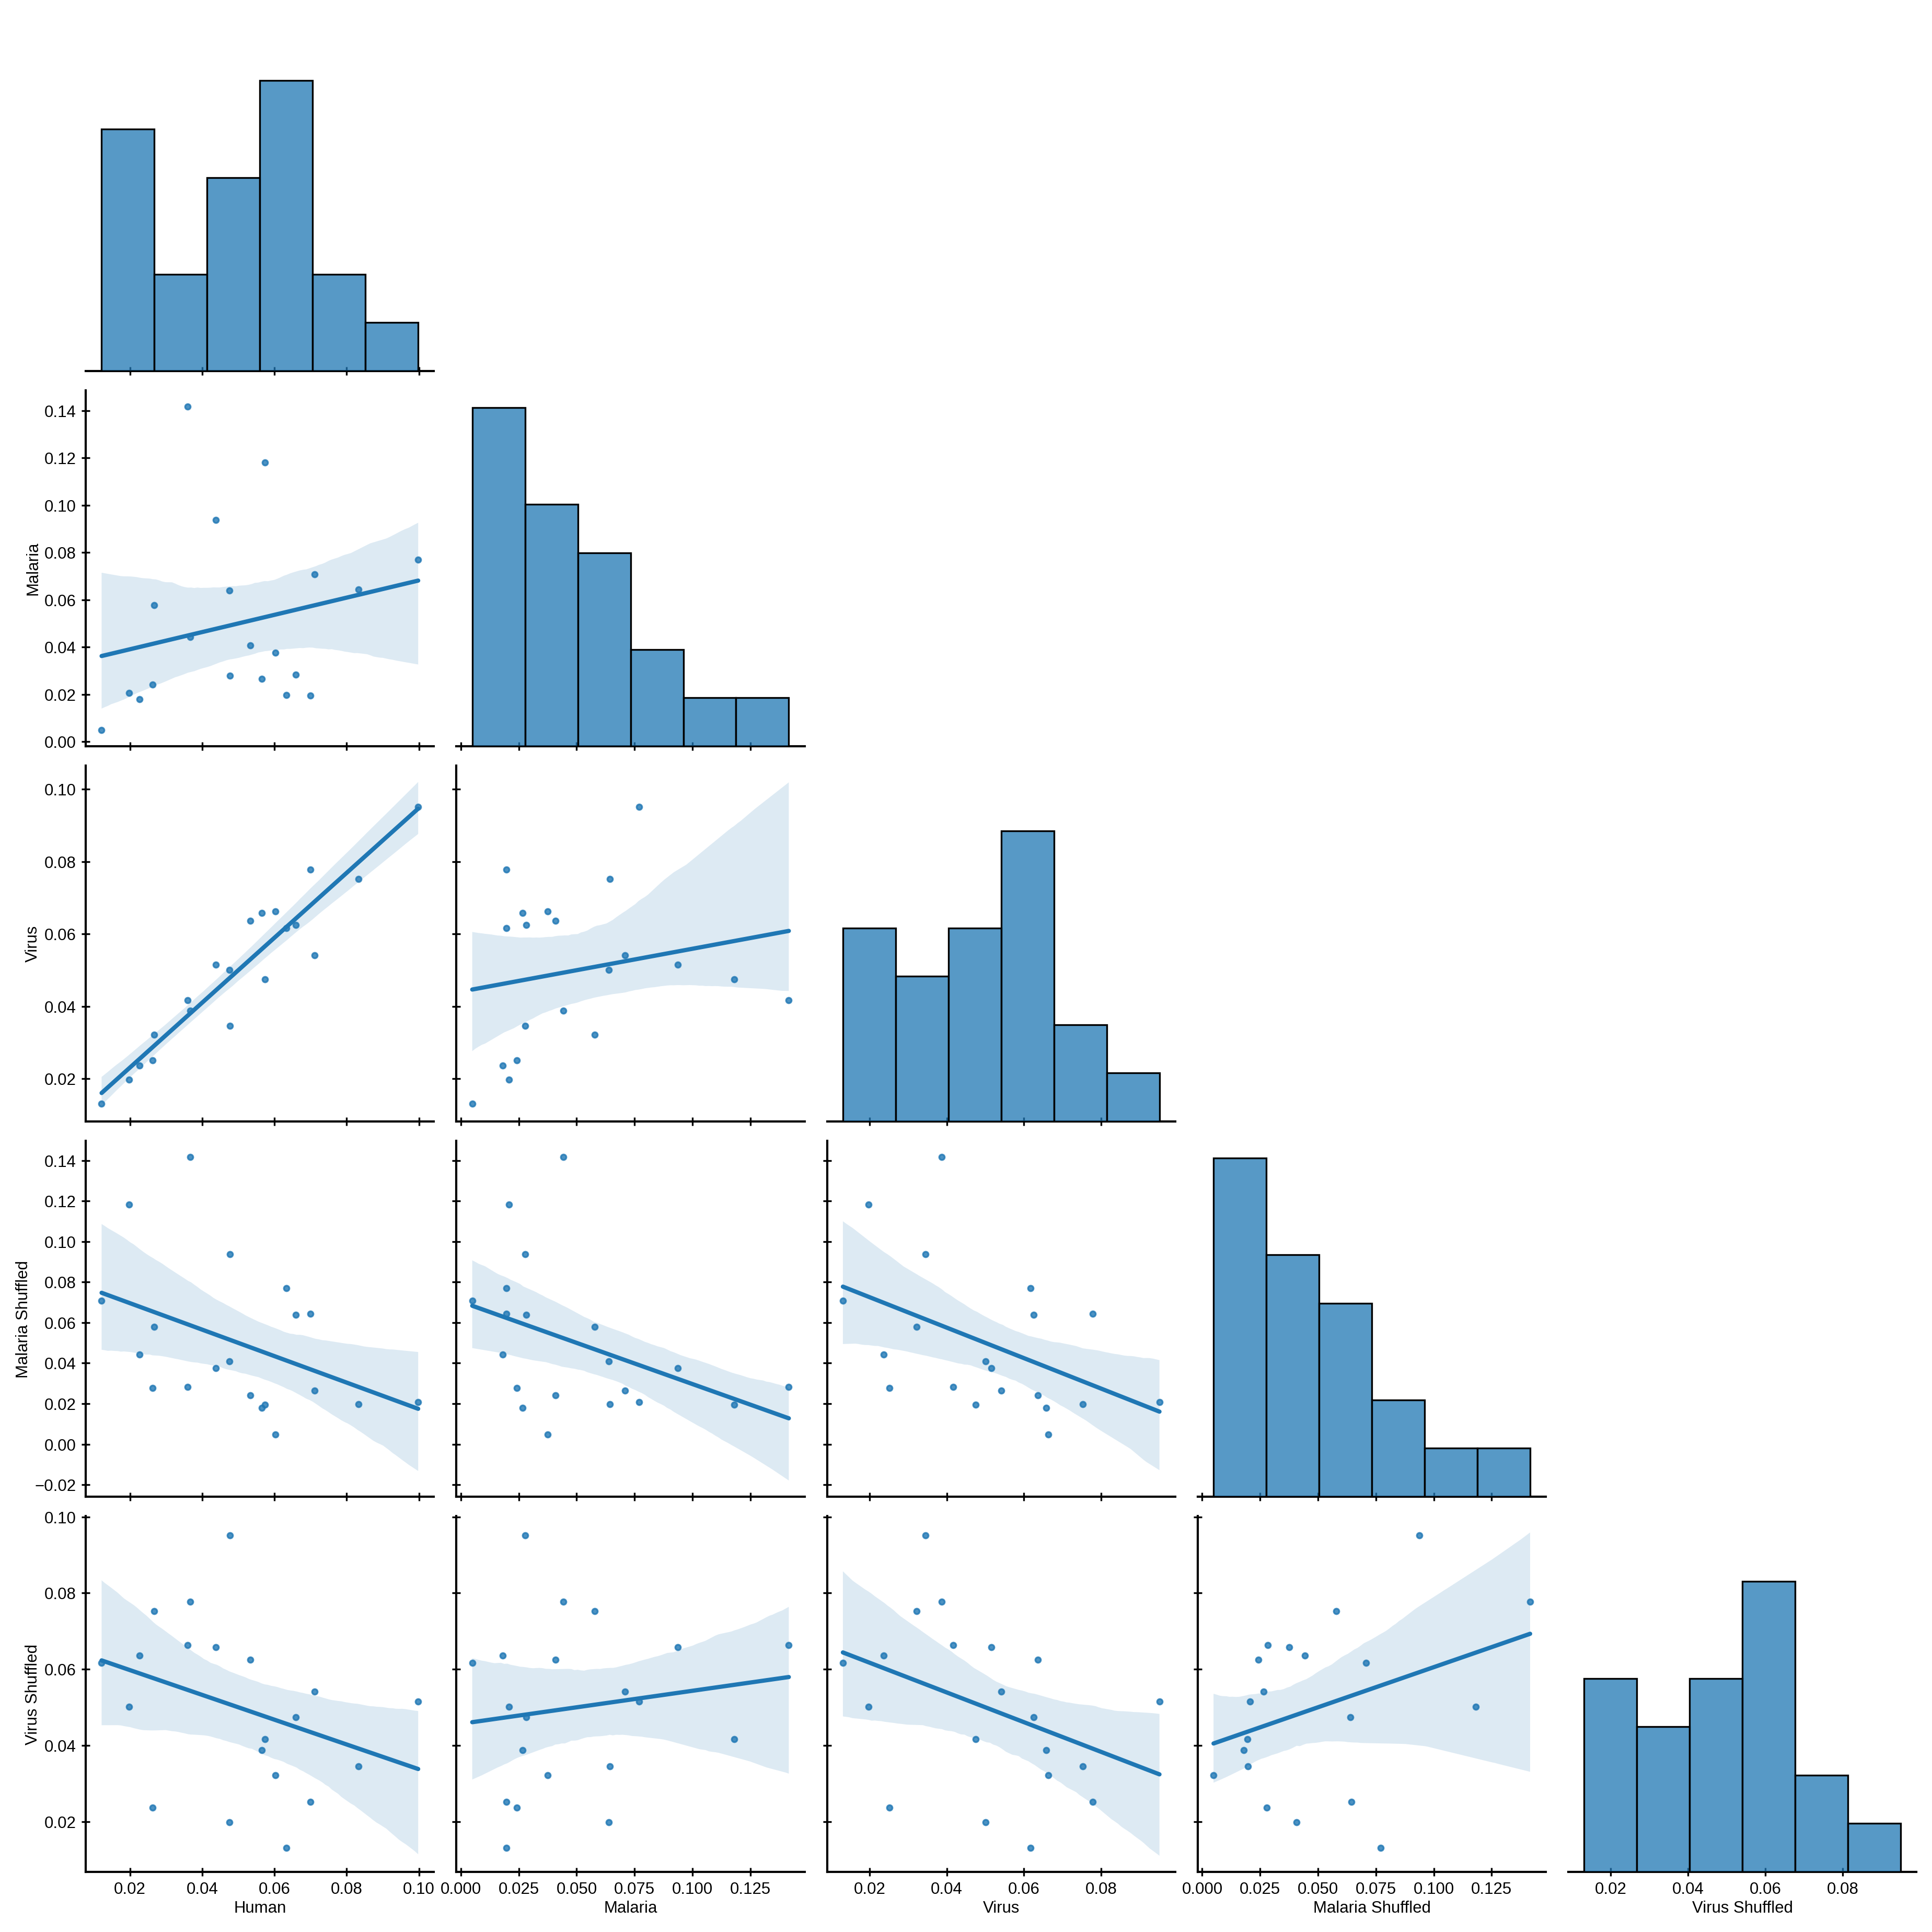

In [28]:
sns.pairplot(data=freq_df.T,corner=True,kind='reg') #plot_kws=dict(marker="o", s=25)

Text(0.5, 1.0, '$R^2 = 0.01$')

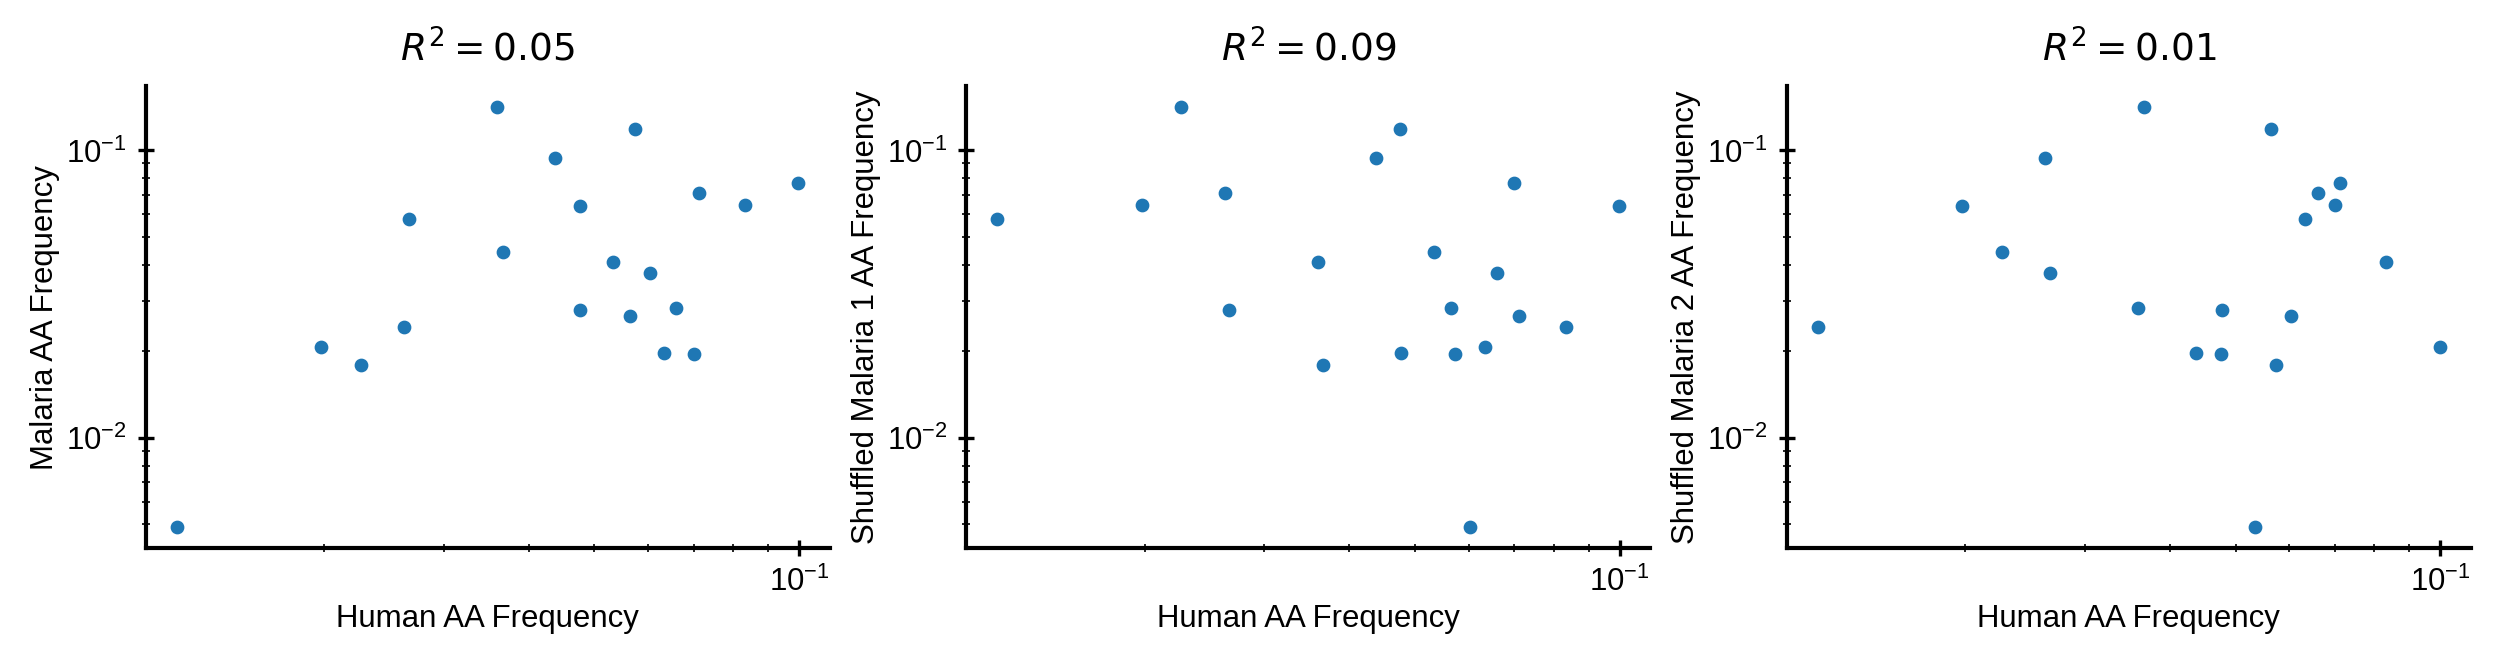

In [53]:
# fig, ax = plt.subplots(figsize=(10, 2), nrows=1, ncols=3)


# m, b, r_value, p_value, std_err = scipy.stats.linregress(human_independent_params['f'], malaria_independent_params['f'])
# ax[0].scatter(human_independent_params['f'],malaria_independent_params['f'])
# ax[0].set_ylabel('Malaria AA Frequency')
# ax[0].set_xlabel('Human AA Frequency')
# ax[0].set_xscale('log')
# ax[0].set_yscale('log')
# ax[0].set_title(f'$R^2 = {round(r_value**2,2)}$')

# m, b, r_value, p_value, std_err = scipy.stats.linregress(human_independent_params['f'],shuffled_array)

# ax[1].scatter(human_independent_params['f'],shuffled_array)
# ax[1].set_ylabel('Shuffled Malaria 1 AA Frequency')
# ax[1].set_xlabel('Human AA Frequency')
# ax[1].set_xscale('log')
# ax[1].set_yscale('log')
# ax[1].set_title(f'$R^2 = {round(r_value**2,2)}$')


# m, b, r_value, p_value, std_err = scipy.stats.linregress(human_independent_params['f'],shuffled_again)

# ax[2].scatter(human_independent_params['f'],shuffled_again)
# ax[2].set_ylabel('Shuffled Malaria 2 AA Frequency')
# ax[2].set_xlabel('Human AA Frequency')
# ax[2].set_xscale('log')
# ax[2].set_yscale('log')
# ax[2].set_title(f'$R^2 = {round(r_value**2,2)}$')


# # plt.scatter(malaria_independent_params['f'],shuffled_array)

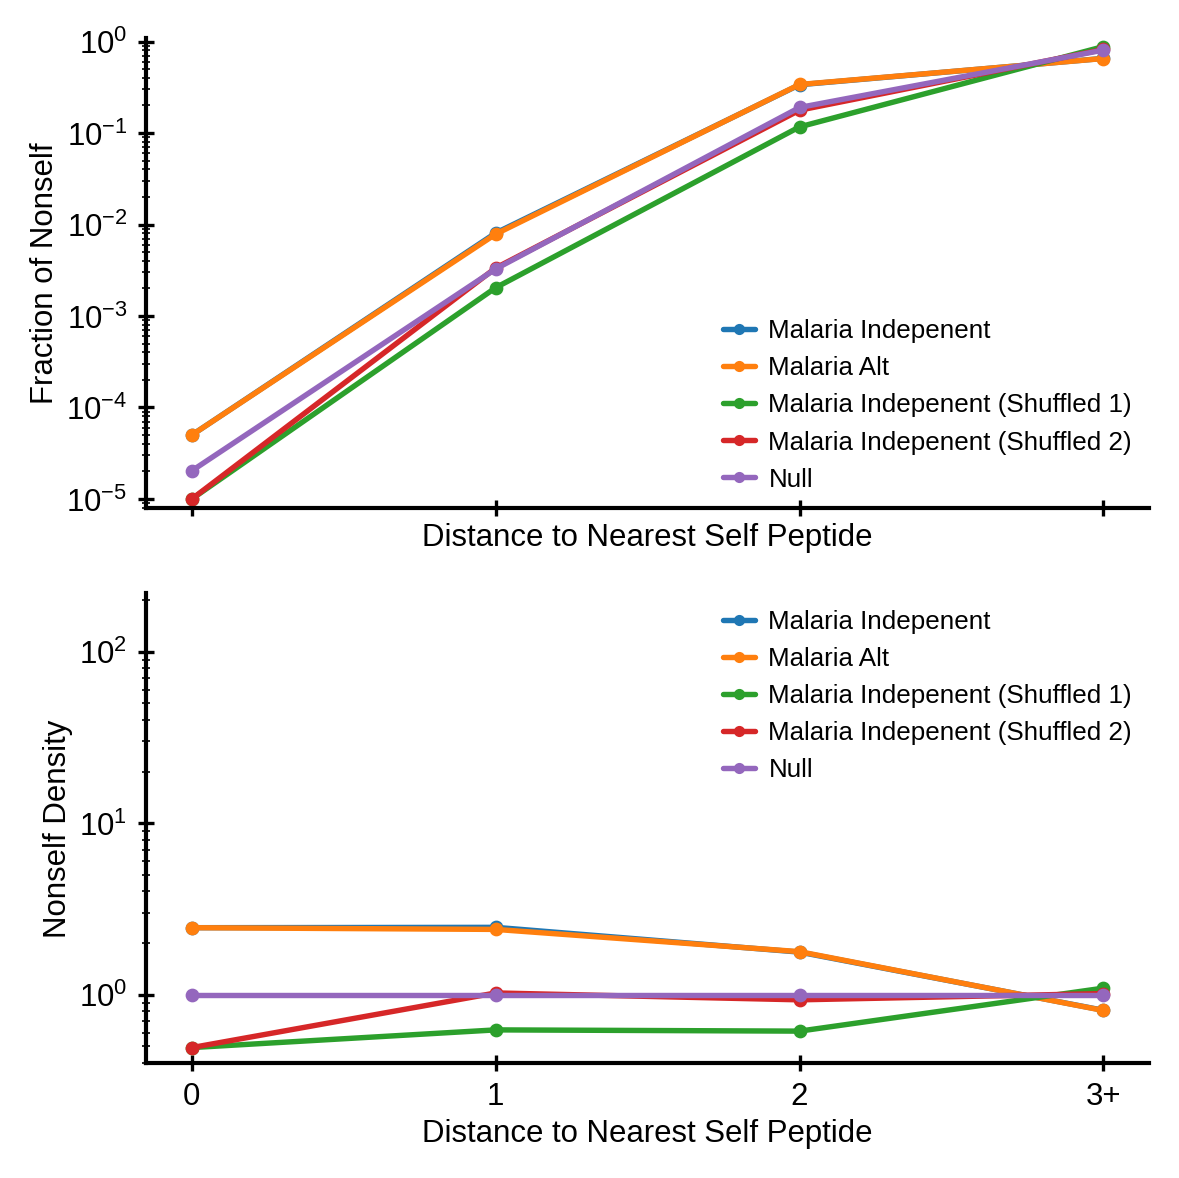

In [59]:
# fig, axes = plt.subplots(figsize=(4, 4), nrows=2, ncols=1, sharex=True)


# model_to_label = {
#     'Malaria_independent': 'Malaria Indepenent',
#     'malaria_alt': 'Malaria Alt',
#     'shuffled_independent': 'Malaria Indepenent (Shuffled 1)',
#     'shuffled_independent2': 'Malaria Indepenent (Shuffled 2)',
#     'uniform': 'Null'
# }
# for model in ['Malaria_independent','malaria_alt', 'shuffled_independent', 'shuffled_independent2', 'uniform']:
#     ps = ps_dict[model].astype(np.float64)
#     axes[0].plot(range(4), ps, '-o', label=model_to_label[model])
#     axes[1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
# #     axes[0,1].set_title('P. Falciparum')

# for ax in axes.reshape(-1):
#     ax.set_yscale('log')
#     ax.legend()
# # axes[0,0].set_yscale('log')
# # axes[1,0].set_yscale('log')
# # axes[0,1].set_yscale('log')
# # axes[1,1].set_yscale('log')

# axes[0].set_xticks([0, 1, 2, 3])
# axes[0].set_xticklabels([0, 1, 2, '3+'])
# axes[1].set_xticks([0, 1, 2, 3])
# axes[1].set_xticklabels([0, 1, 2, '3+'])

# axes[0].set_ylim(8e-6, 1.1)
# axes[0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
# axes[0].set_ylim(8e-6, 1.1)
# axes[1].set_yticks([1e0, 1e1, 1e2])
# axes[1].set_ylim(4e-1, 2.2e2)
# axes[0].set_ylabel('Fraction of Nonself')
# # axes[0,0].legend(loc='lower right')
# axes[1].set_ylabel('Nonself Density')
# # axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

# axes[0].set_xlabel('Distance to Nearest Self Peptide')
# axes[1].set_xlabel('Distance to Nearest Self Peptide')

# axes[0].legend()
# axes[1].legend()


# fig.tight_layout()

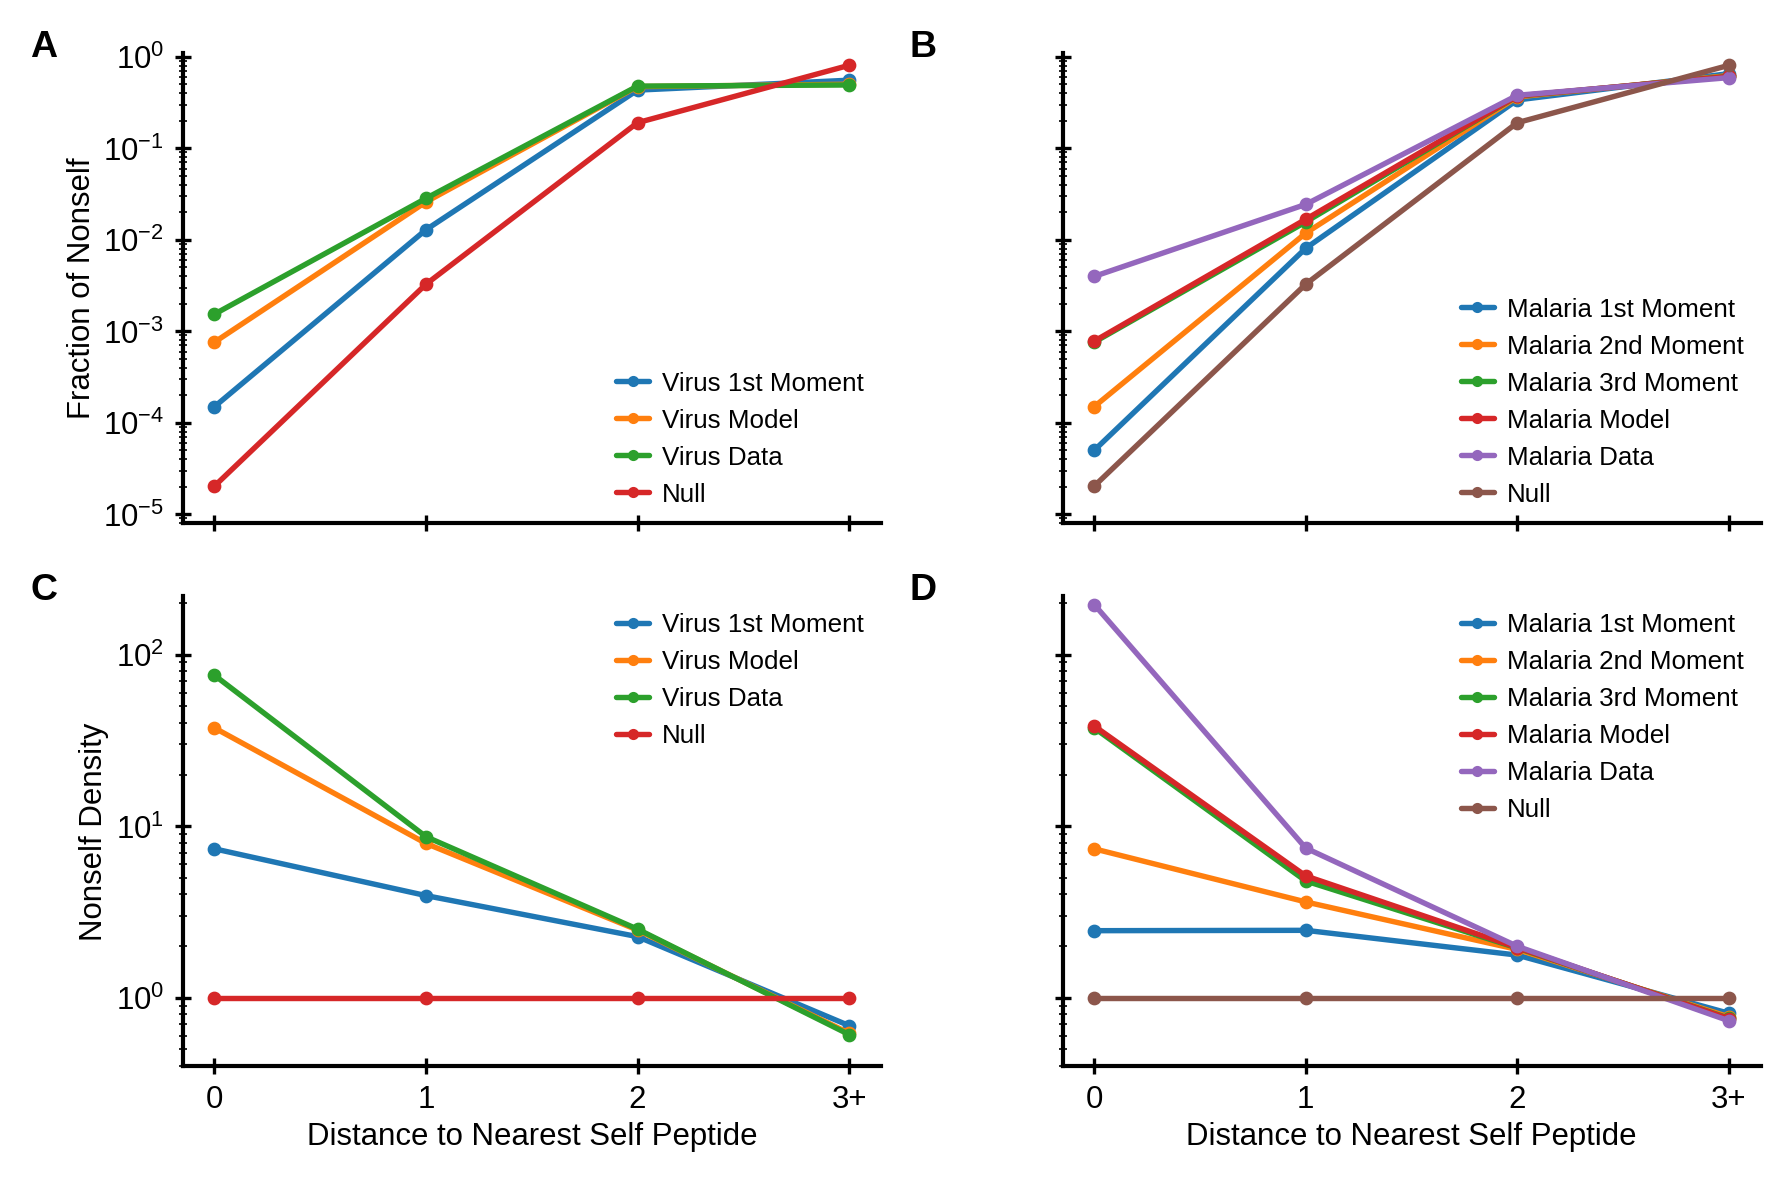

In [48]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 3rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

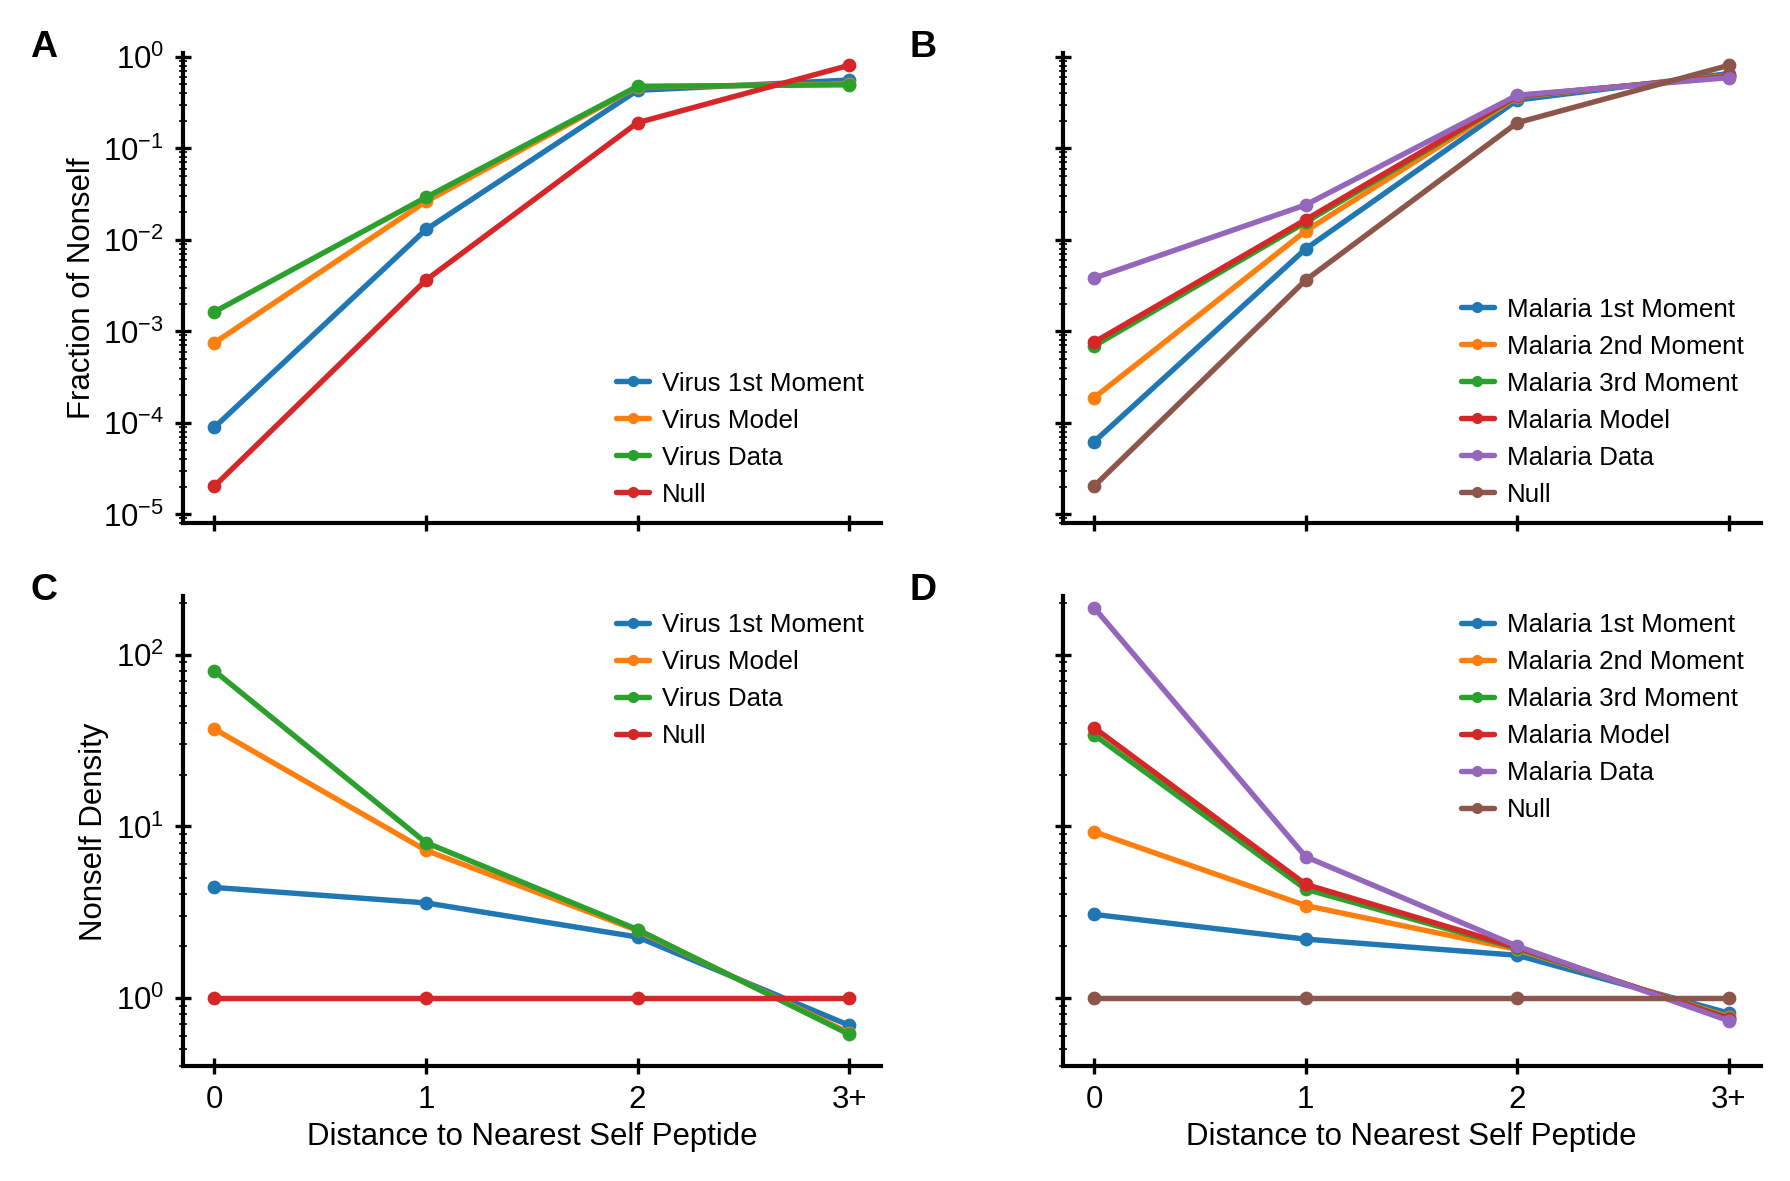

In [13]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 3rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

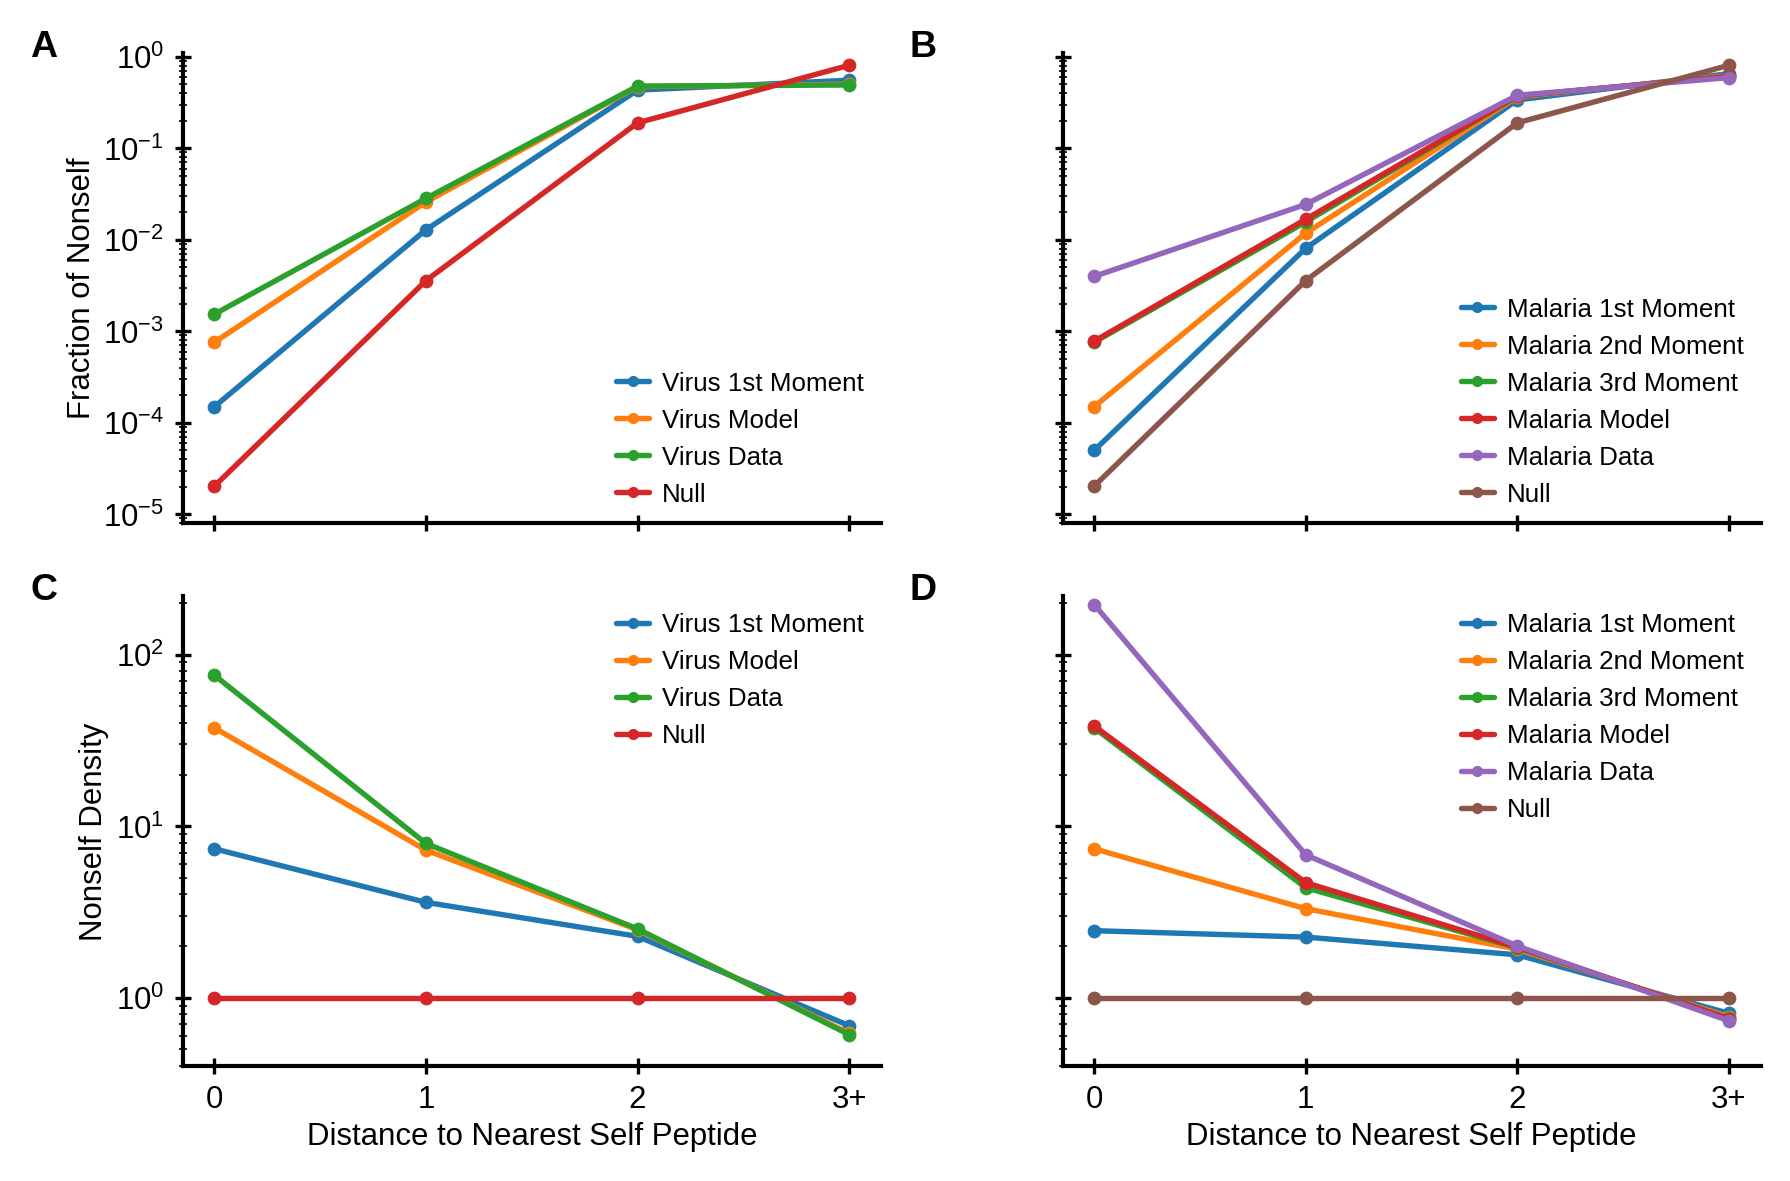

In [43]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 3rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')]

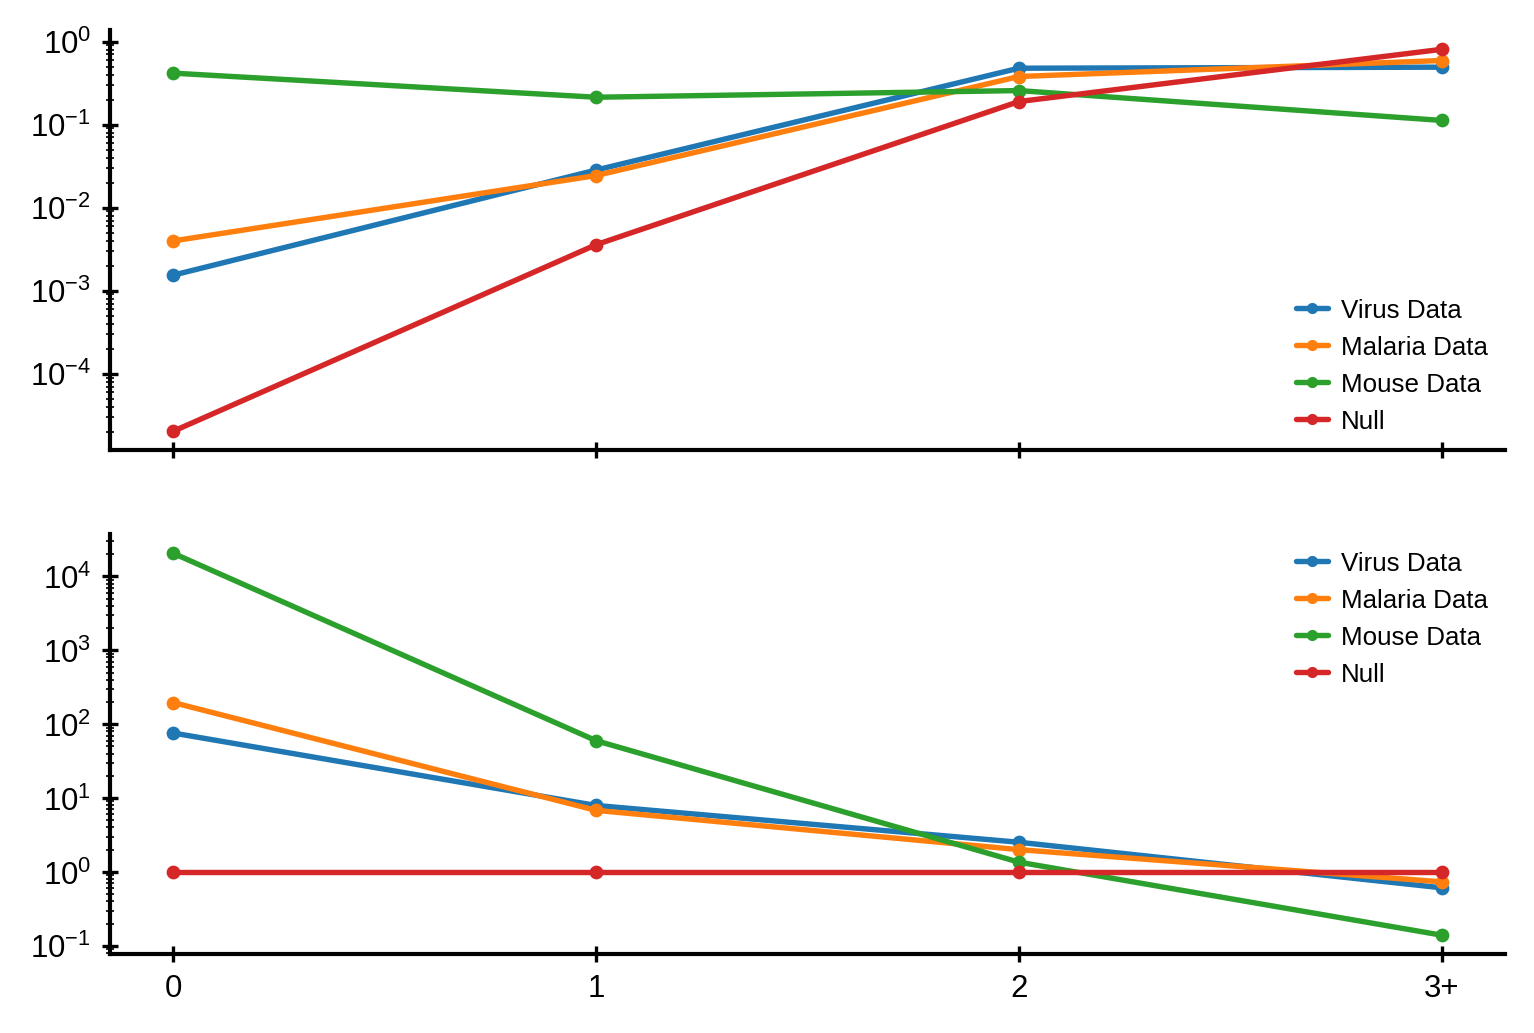

In [38]:
fig, ax = plt.subplots(figsize=(6, 4),nrows=2,ncols=1,sharex=True)
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_train','Malaria_train','Mouse_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    ax[0].plot(range(4), ps, '-o', label=model_to_label[model])
    ax[1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].legend()
ax[1].legend()
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_xticklabels([0, 1, 2, '3+'])



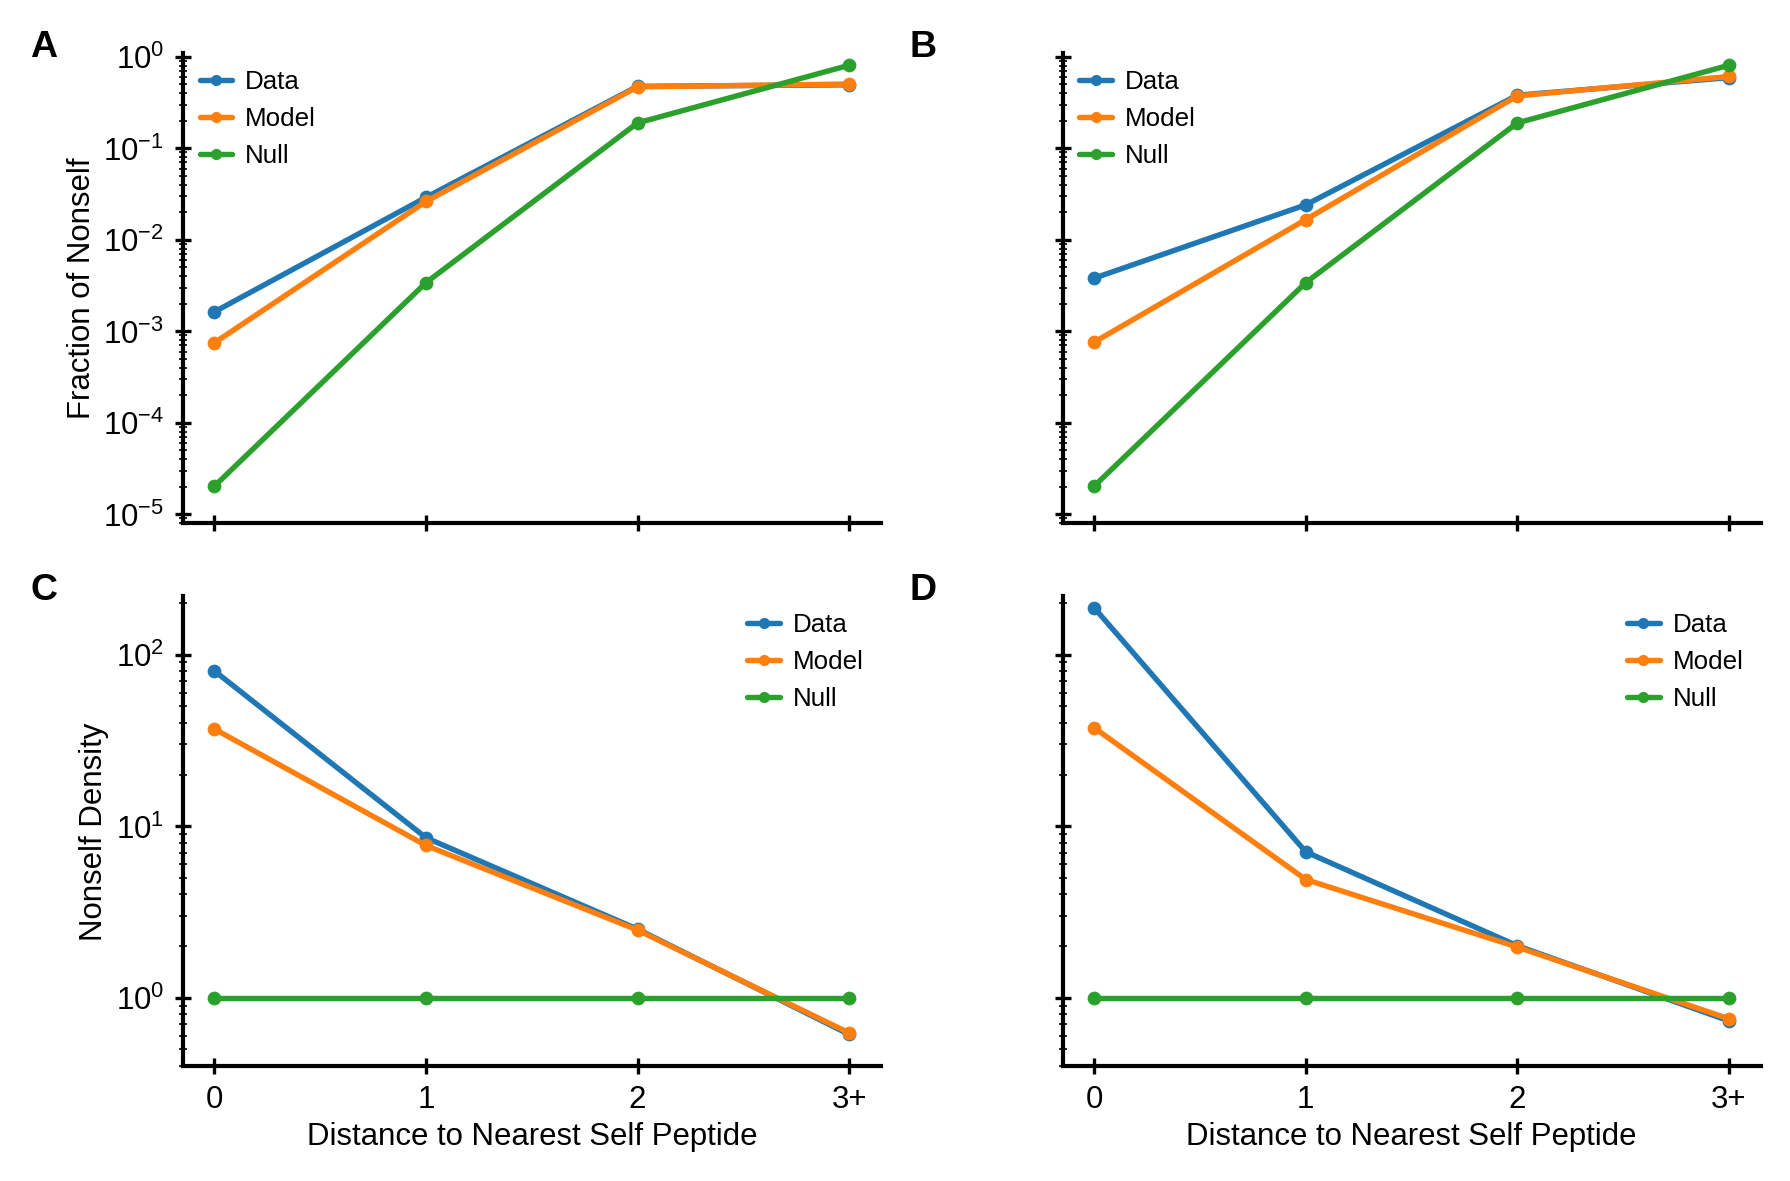

In [13]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_nskewfcov': 'Model',
    'Humanviruses_train': 'Data',
    'Malaria_nskewfcov': 'Model',
    'Malaria_train': 'Data',
    'uniform': 'Null'
    
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(float)
for model in ['Humanviruses_train', 'Humanviruses_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_train', 'Malaria_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
plt.savefig('../fig3_not_annotated.png')
plt.savefig('../fig3_not_annotated.svg')

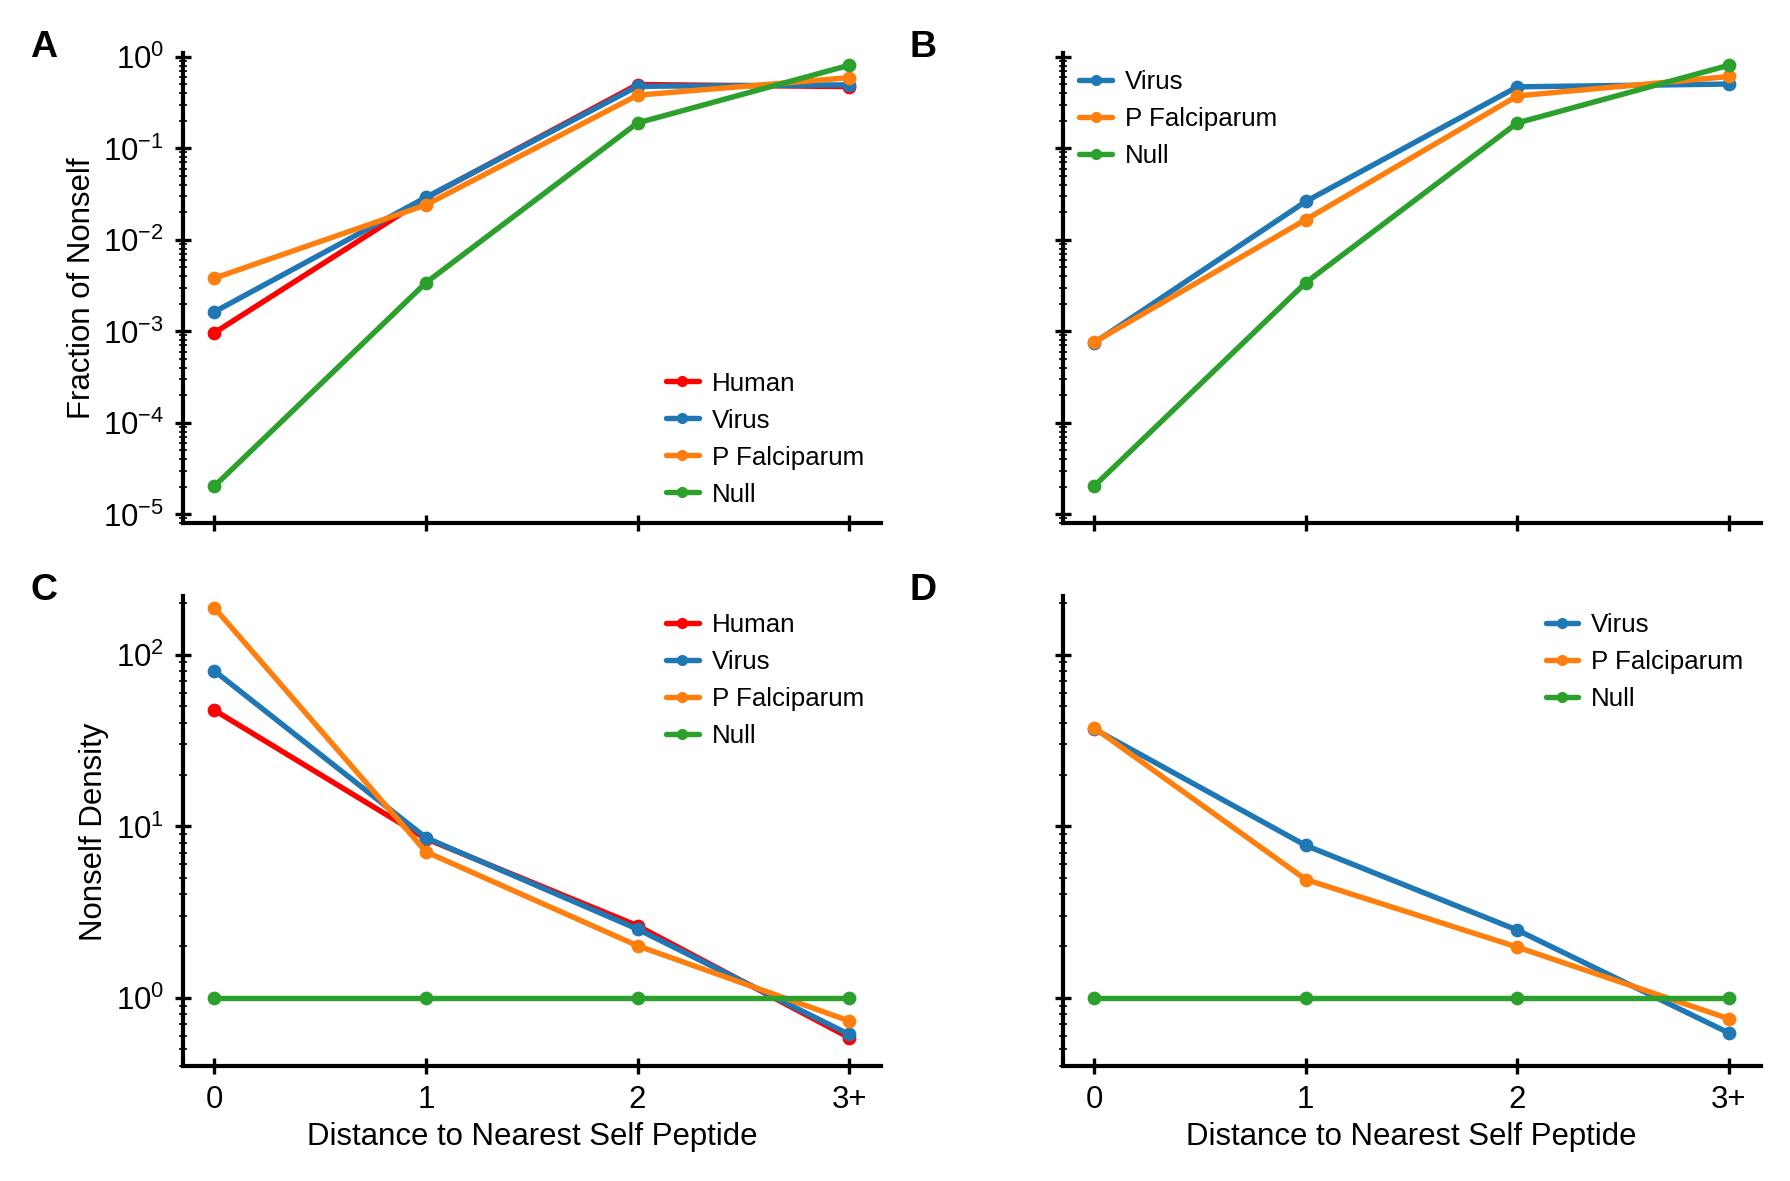

In [17]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_nskewfcov': 'Virus',
    'Humanviruses_train': 'Virus',
    'Malaria_nskewfcov': 'P Falciparum',
    'Malaria_train': 'P Falciparum',
    'Human_nskewfcov': 'Human',
    'uniform': 'Null'
    
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(float)
for model in ['Human_nskewfcov', 'Humanviruses_train', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    if model == 'Human_nskewfcov':
        axes[0,0].plot(range(4), ps, '-o', color='red',label=model_to_label[model])
        axes[1,0].plot(range(4), ps/ps_flat, '-o', color='red',label=model_to_label[model])
    else:  
        axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
        axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Humanviruses_nskewfcov', 'Malaria_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
plt.savefig('../alt_fig3.png')
plt.savefig('../alt_fig3.svg')

Humanviruses_train error:
[5.56454865e-05 2.31696728e-04 6.88404286e-04 6.89175664e-04]
Humanviruses_train N:
526274.0
Humanviruses_nskewfcov error:
[3.77035128e-05 2.20290796e-04 6.87944340e-04 6.89218229e-04]
Humanviruses_nskewfcov N:
526264.0
uniform error:
[1.42584106e-05 1.75228810e-04 1.23931332e-03 1.24699275e-03]
uniform N:
100000.0
Malaria_train error:
[4.36594575e-05 1.08665496e-04 3.44115848e-04 3.48393085e-04]
Malaria_train N:
1990342.0
Malaria_nskewfcov error:
[1.97694091e-05 9.16290190e-05 3.46810886e-04 3.49825873e-04]
Malaria_nskewfcov N:
1945891.0
uniform error:
[1.42584106e-05 1.75228810e-04 1.23931332e-03 1.24699275e-03]
uniform N:
100000.0


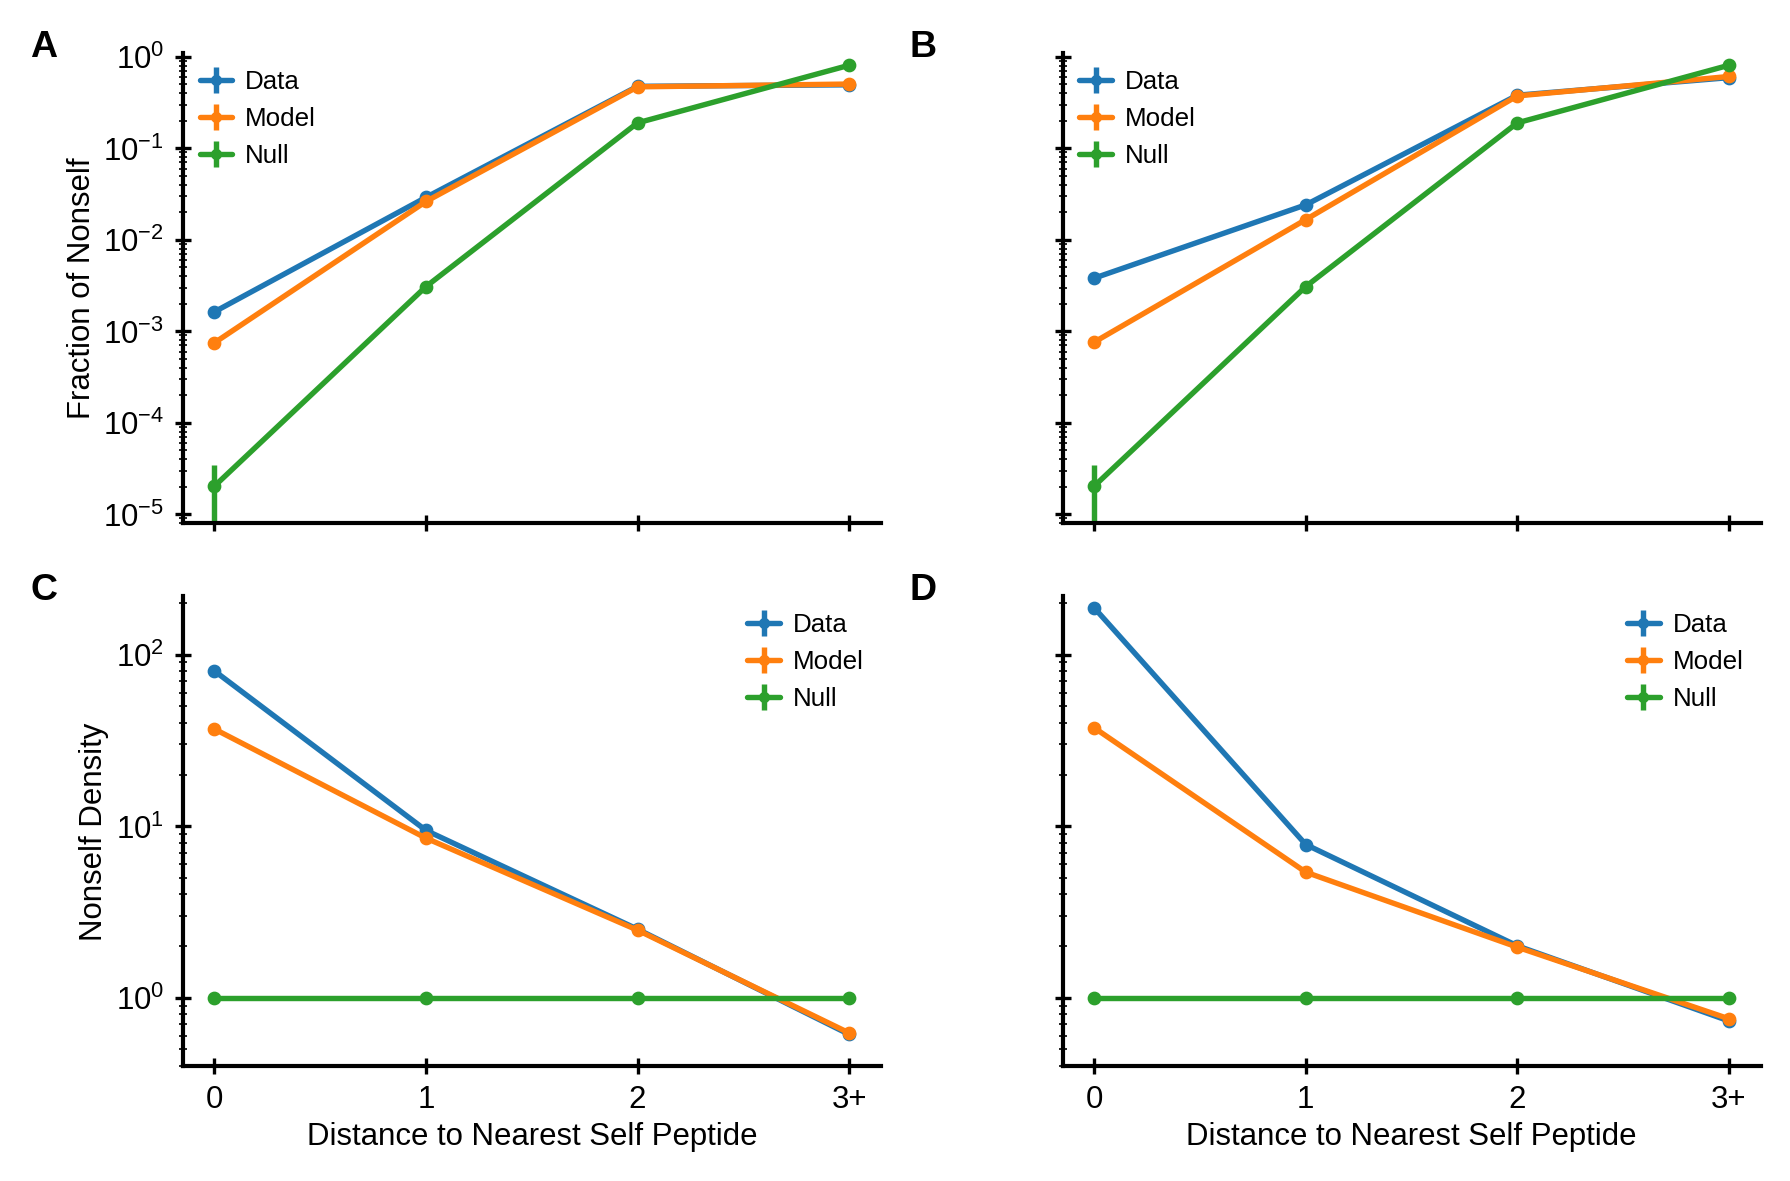

In [26]:
# with error bars

fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_nskewfcov': 'Model',
    'Humanviruses_train': 'Data',
    'Malaria_nskewfcov': 'Model',
    'Malaria_train': 'Data',
    'uniform': 'Null'
    
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_train', 'Humanviruses_nskewfcov', 'uniform']:
    ps = np.array(ps_dict[model]).astype(np.float64)
    ns = np.array(ns_dict[model]).astype(np.float64)
    N = sum(ns)
    error = np.sqrt(ps*(1-ps)/N)
    print(model+" error:")
    print(error)
    print(model+" N:")
    print(N)
    axes[0,0].errorbar(range(4), ps, fmt='-o', yerr=error,label=model_to_label[model])
    axes[1,0].errorbar(range(4), ps/ps_flat, fmt='-o', yerr=error,label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_train', 'Malaria_nskewfcov', 'uniform']:
    ps = np.array(ps_dict[model]).astype(np.float64)
    ns = np.array(ns_dict[model]).astype(np.float64)
    N = sum(ns)
    error = np.sqrt(ps*(1-ps)/N)
    print(model+" error:")
    print(error)
    print(model+" N:")
    print(N)
    axes[0,1].errorbar(range(4), ps, fmt='-o', yerr=error,label=model_to_label[model])
    axes[1,1].errorbar(range(4), ps/ps_flat,fmt='-o', yerr=error,label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
# plt.savefig('../fig3_not_annotated.png')
# plt.savefig('../fig3_not_annotated.svg')

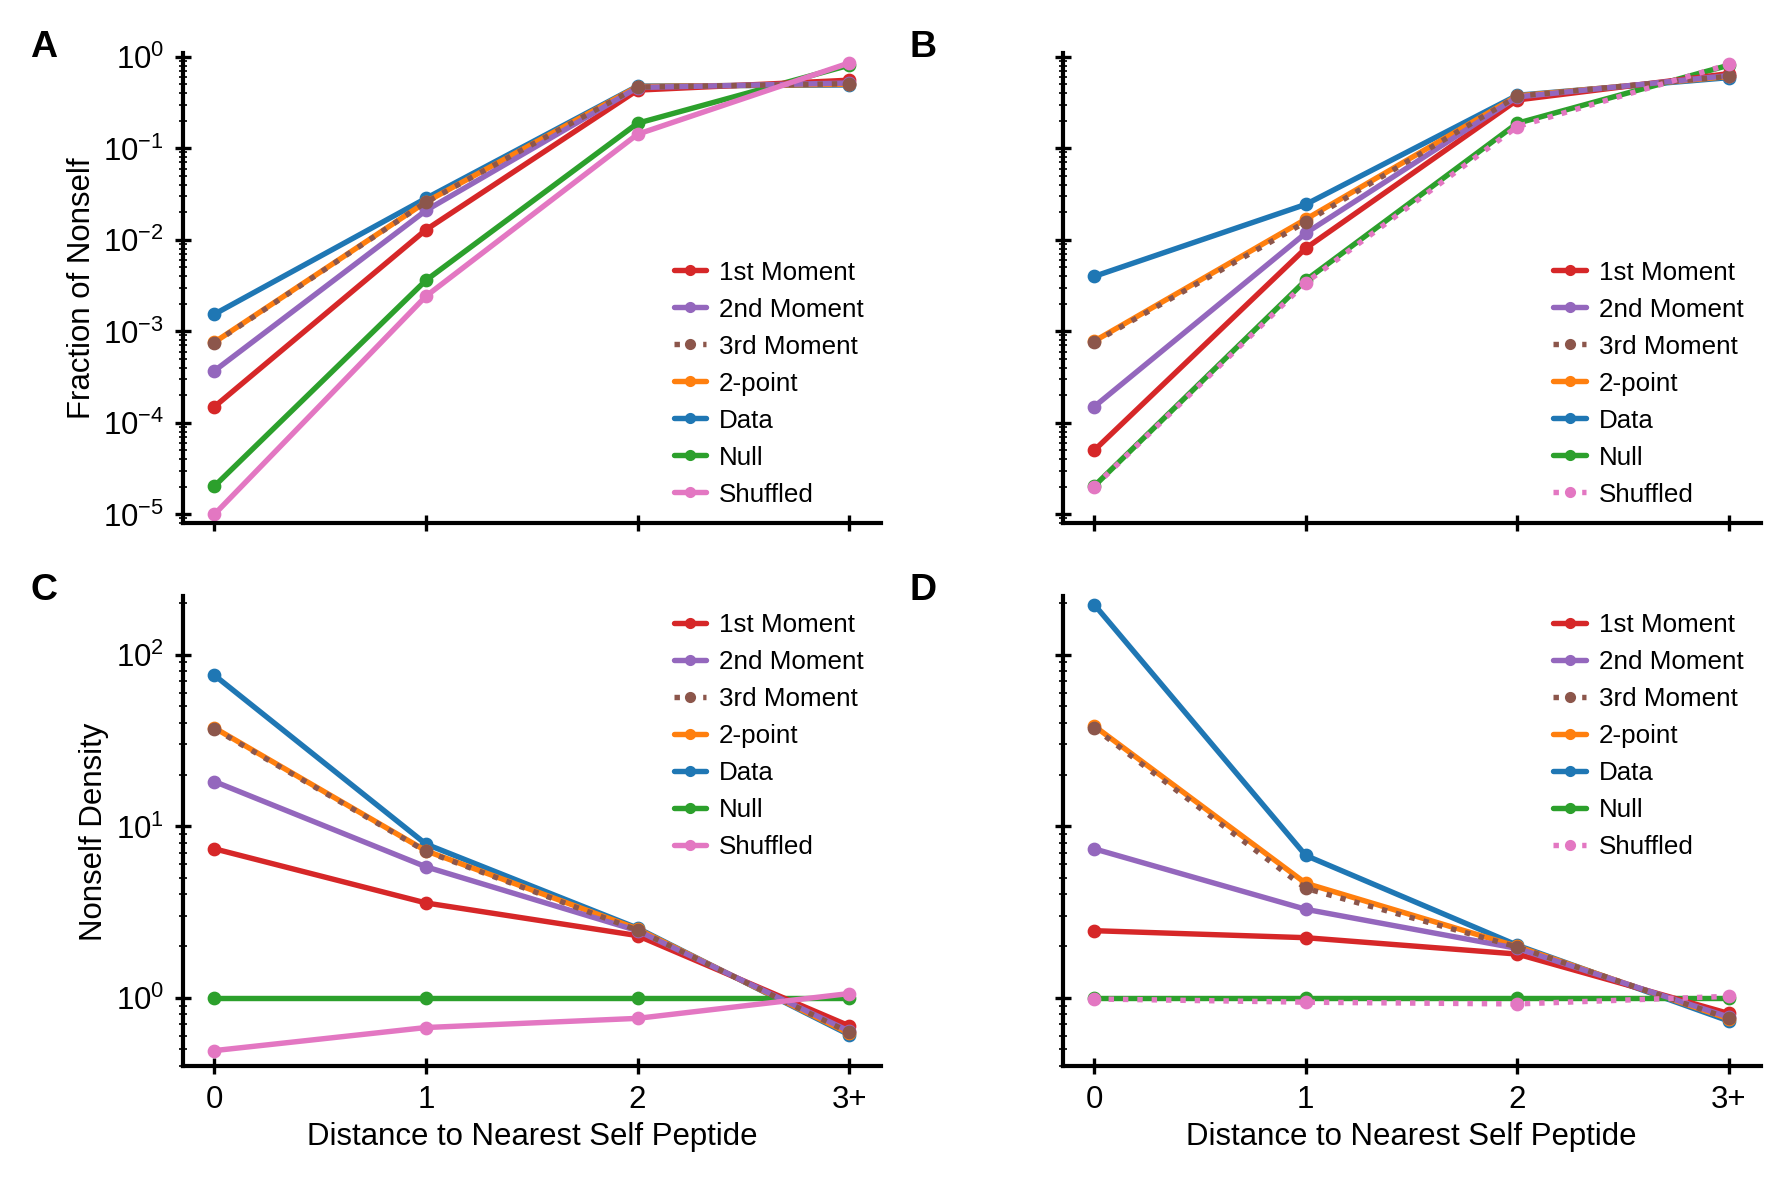

In [84]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': '1st Moment',
    'Humanviruses_nskewfcov': '2-point',
    'Humanviruses_ncov': '2nd Moment',
    'Humanviruses_nskew': '3rd Moment',
    'Humanviruses_train': 'Data',
    'Malaria_independent': '1st Moment',
    'Malaria_ncov': '2nd Moment',
    'Malaria_nskew': '3rd Moment',
    'Malaria_nskewfcov': '2-point',
    'Malaria_train': 'Data',
#     'Malaria_test': 'Malaria Train Data',
#     'Mouse_train': 'Mouse Data',
    'uniform': 'Null',
    'malaria_shuffled_independent': 'Shuffled',
    'malaria_shuffled_independent2': 'Shuffled',

    'virus_shuffled_independent': 'Shuffled'
}



# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_train','Humanviruses_nskewfcov','uniform',
              'Humanviruses_independent', 'Humanviruses_ncov', 'Humanviruses_nskew','virus_shuffled_independent']:
    ps = ps_dict[model].astype(np.float64)
#     style = '-o' if ('uniform' not in model and 'shuffle' not in model) else '--o'
    if model in ['Humanviruses_nskew']:
        linestyle = 'dotted'
    else:
        linestyle = 'solid'
    axes[0,0].plot(range(4), ps,linestyle=linestyle,marker='o',label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, linestyle=linestyle,marker='o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_train','Malaria_nskewfcov',  'uniform',
              'Malaria_independent', 'Malaria_ncov', 'Malaria_nskew','malaria_shuffled_independent2']:
    ps = ps_dict[model].astype(np.float64)
    if model in ['Malaria_nskew','malaria_shuffled_independent2']:
        linestyle = 'dotted'
    else:
        linestyle = 'solid'    
    axes[0,1].plot(range(4), ps, linestyle=linestyle,marker='o',label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, linestyle=linestyle,marker='o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    new_order = [3, 4, 5,1,0,2,6]
    handles = [handles[i] for i in new_order]
    labels = [labels[i] for i in new_order]
    ax.legend(handles, labels)
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
plt.savefig('../fig3_other_models_not_annotated.png')
plt.savefig('../fig3_other_models_not_annotated.svg')

In [17]:
models = [
    "Listeria_train",
    "Listeria_nskewfcov",
    "StrepA_train",
    "StrepA_nskewfcov",
    "Tuberculosis_train",
    "Tuberculosis_nskewfcov",
    "Zebrafish_train",
    "Chicken_train"
    
]

In [18]:
for model in models:
    df = pd.read_csv(f'{datadir}/{model}_distance_to_self_no_sampling.csv',names=['0', '1', '2', '3+'])
    ns_dict[model] = np.array(df.loc['N'].values)
    ps_dict[model] = np.array(df.loc['P'].values)

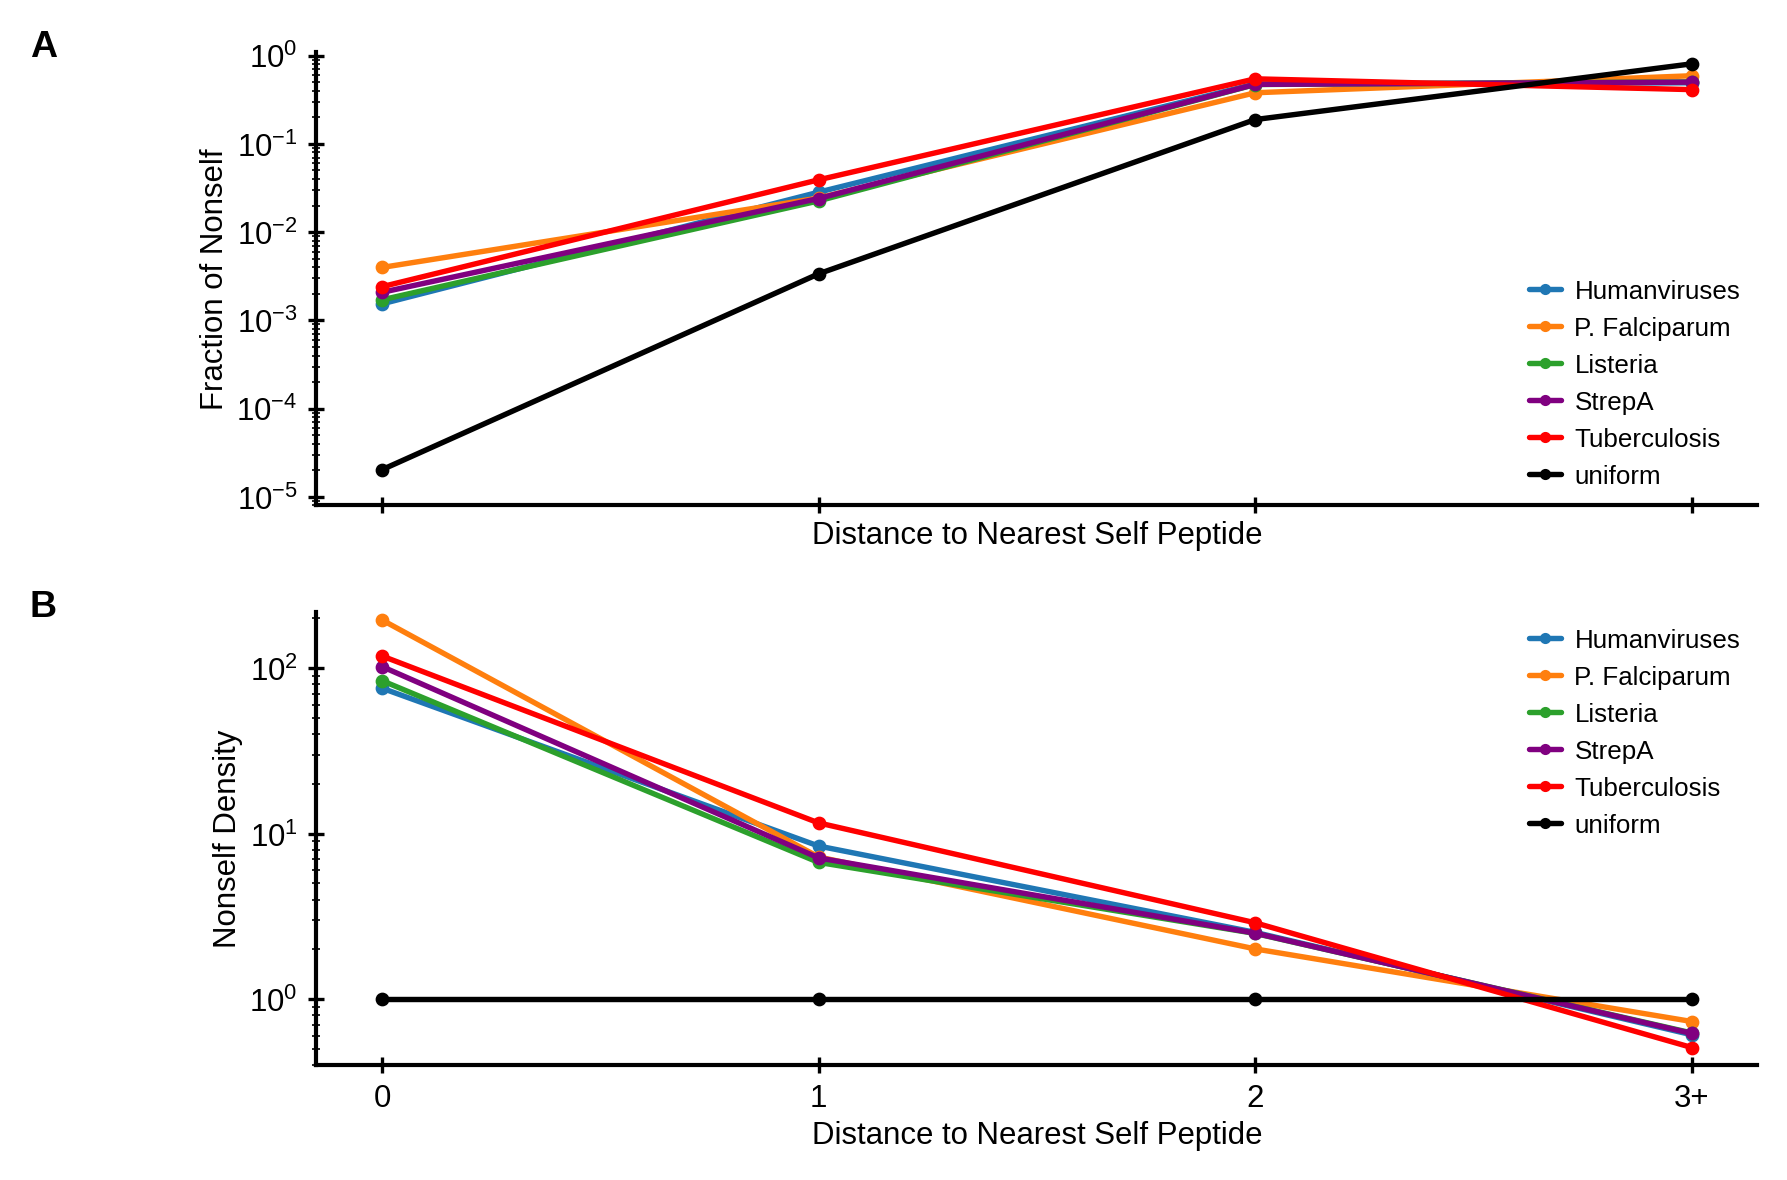

In [27]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=1,sharex=True)

blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
coloring = [blue,orange,green,'purple','red','black']

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for i,model in enumerate(['Humanviruses_train','Malaria_train','Listeria_train', 'StrepA_train', 'Tuberculosis_train','uniform']):
    ps = ps_dict[model].astype(np.float64)
    if model == 'Malaria_train':
        model = 'P. Falciparum_'
    axes[0].plot(range(4), ps, '-o', label=model.split("_")[0],color=coloring[i])
    axes[1].plot(range(4), ps/ps_flat, '-o', label=model.split("_")[0],color=coloring[i])
#     axes[0,0].set_title('Human Viruses')
    

# for i,model in enumerate(['Listeria_nskewfcov', 'StrepA_nskewfcov', 'Tuberculosis_nskewfcov','uniform']):
#     ps = ps_dict[model].astype(np.float64)
#     axes[0].plot(range(4), ps, linestyle='dotted',marker='o', color=coloring[i])
#     axes[1].plot(range(4), ps/ps_flat, linestyle='dotted',marker='o', color=coloring[i])
# #     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels([0, 1, 2, '3+'])
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels([0, 1, 2, '3+'])

axes[0].set_ylim(8e-6, 1.1)
axes[0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))

axes[1].set_yticks([1e0, 1e1, 1e2])
axes[1].set_ylim(4e-1, 2.2e2)

axes[0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[0].set_xlabel('Distance to Nearest Self Peptide')
axes[1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()


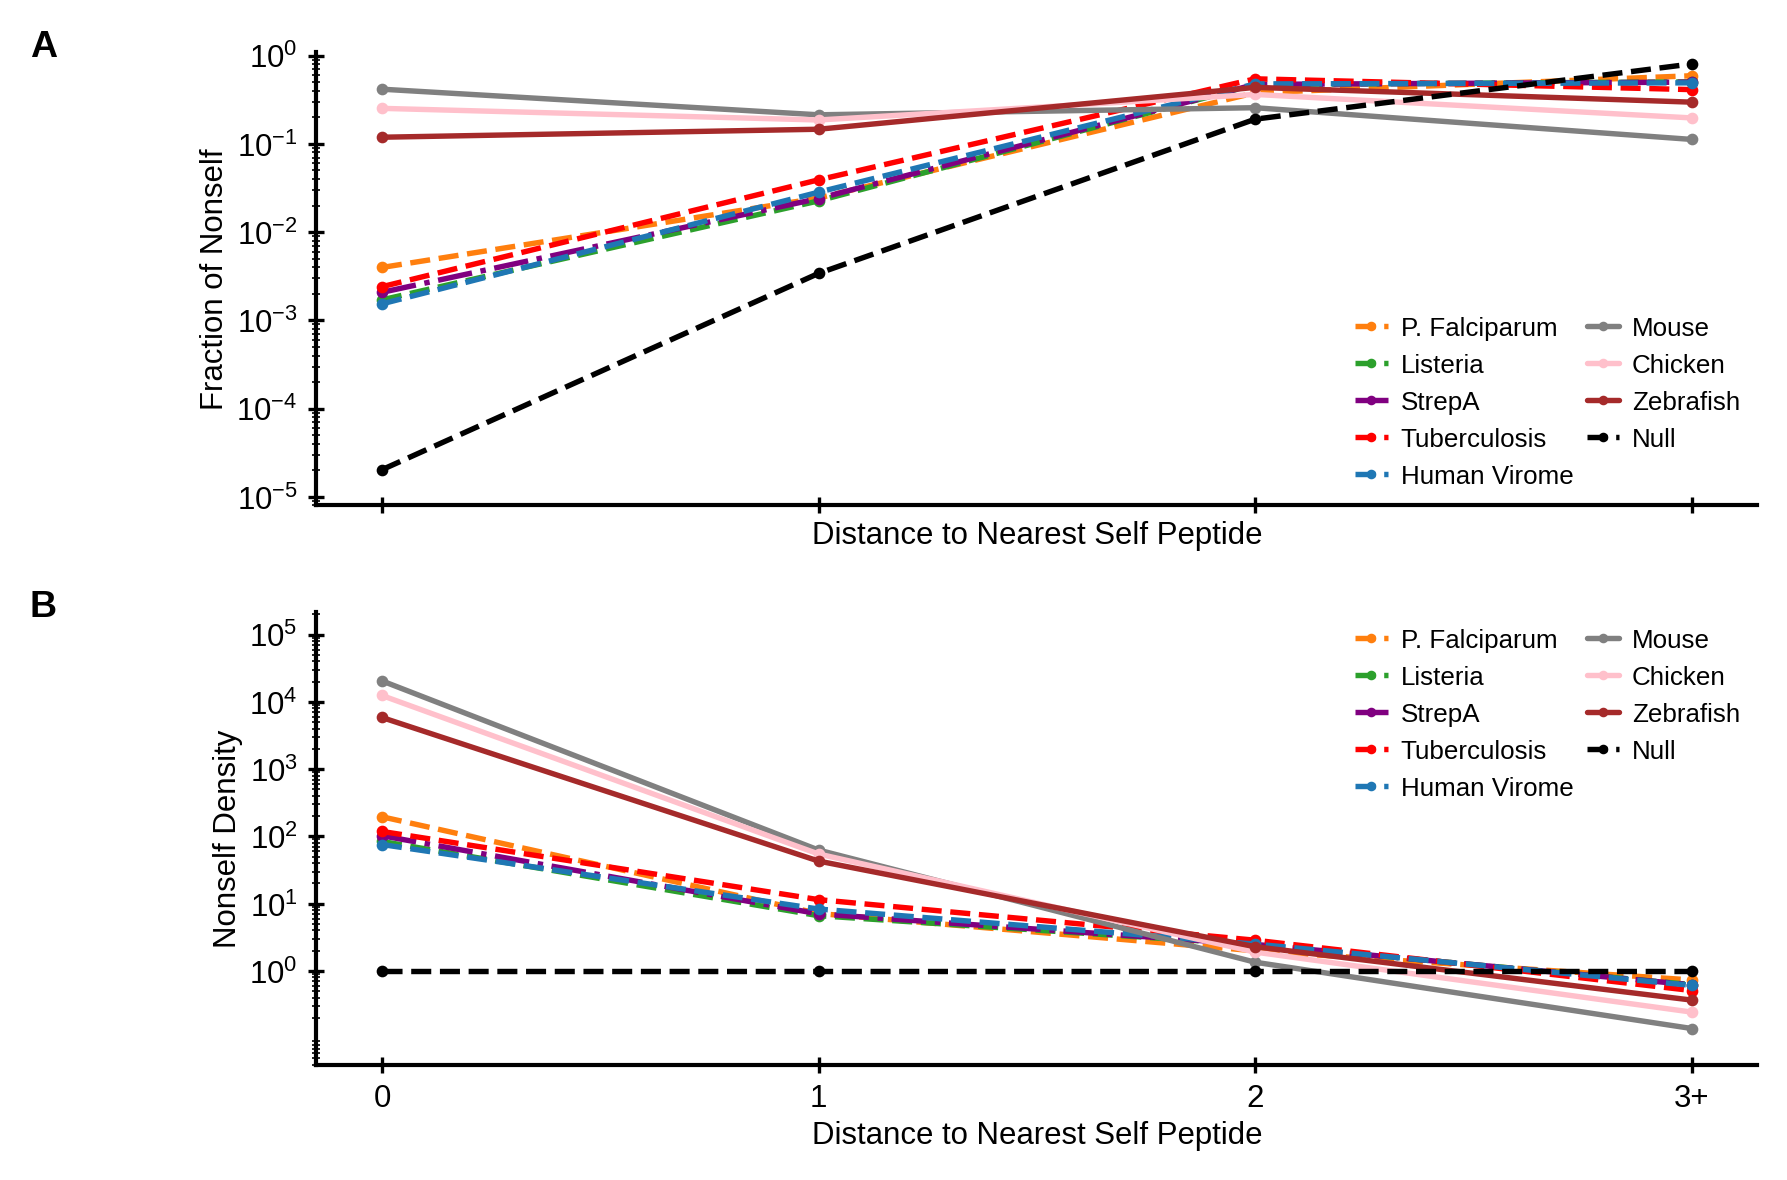

In [37]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=1,sharex=True)

blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
coloring = [orange,green,'purple','red',blue,'gray','pink','brown','black']
linestyles = ['dashed','dashed','dashdot','dashed','dashed','solid','solid','solid','dashed']

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for i,model in enumerate(['Malaria_train','Listeria_train', 'StrepA_train', 'Tuberculosis_train','Humanviruses_train',
                          'Mouse_train','Chicken_train','Zebrafish_train','uniform']):
    ps = ps_dict[model].astype(np.float64)
    linestyle = linestyles[i]
    if model == 'Malaria_train':
        model = 'P. Falciparum_'
    elif model == 'Humanviruses_train':
        model = 'Human Virome'
    elif model == 'uniform':
        model = 'Null'
    axes[0].plot(range(4), ps, marker='o', linestyle=linestyle,markersize=2,label=model.split("_")[0],color=coloring[i])
    axes[1].plot(range(4), ps/ps_flat, linestyle=linestyle,marker='o', markersize=2,label=model.split("_")[0],color=coloring[i])
#     axes[0,0].set_title('Human Viruses')
    

# for i,model in enumerate(['Listeria_nskewfcov', 'StrepA_nskewfcov', 'Tuberculosis_nskewfcov','uniform']):
#     ps = ps_dict[model].astype(np.float64)
#     axes[0].plot(range(4), ps, linestyle='dotted',marker='o', color=coloring[i])
#     axes[1].plot(range(4), ps/ps_flat, linestyle='dotted',marker='o', color=coloring[i])
# #     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend(ncol=2)
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels([0, 1, 2, '3+'])
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels([0, 1, 2, '3+'])

axes[0].set_ylim(8e-6, 1.1)
axes[0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))

axes[1].set_yticks([0,1e0, 1e1, 1e2,1e3,1e4,1e5])
axes[1].set_ylim(4e-2, 2.2e5)

axes[0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[0].set_xlabel('Distance to Nearest Self Peptide')
axes[1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()


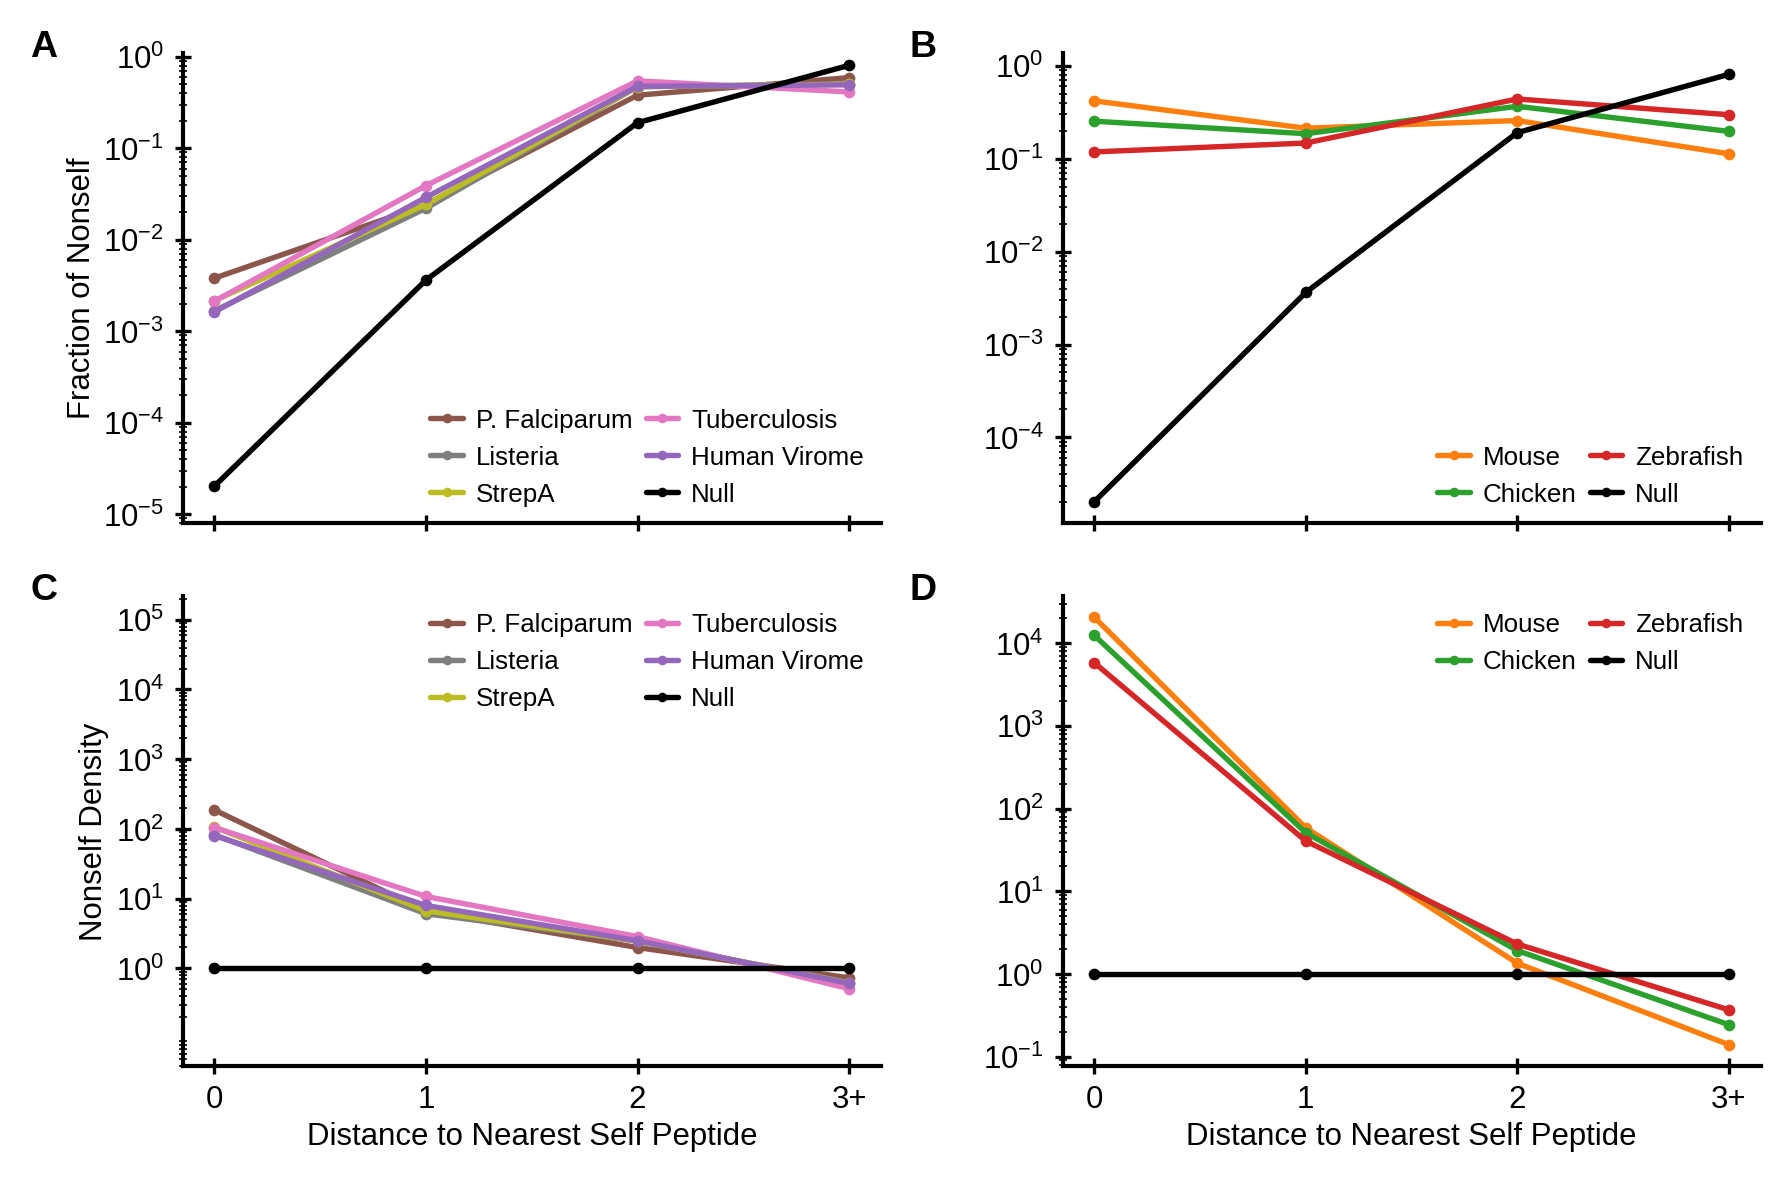

In [25]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2,sharex=True)

    
ps_flat = ps_dict['uniform']



coloring = {
    'Mouse_train': '#ff7f0e',
    'Chicken_train': '#2ca02c',
    'Zebrafish_train': '#d62728',
    'Humanviruses_train': '#9467bd',
    'Malaria_train': '#8c564b',
    'Tuberculosis_train': '#e377c2',
    'Listeria_train': '#7f7f7f',
    'StrepA_train': '#bcbd22',
    'uniform': 'black',
    'Null': 'black'
}

for i,model in enumerate(['Malaria_train','Listeria_train', 'StrepA_train', 'Tuberculosis_train','Humanviruses_train','uniform']):
    ps = ps_dict[model].astype(np.float64)
    c = coloring[model]
#     linestyle = linestyles[i]
    if model == 'Malaria_train':
        model = 'P. Falciparum_'
    elif model == 'Humanviruses_train':
        model = 'Human Virome'
    elif model == 'uniform':
        model = 'Null'
    axes[0,0].plot(range(4), ps, marker='o', linestyle='solid',markersize=2,label=model.split("_")[0],color=c)
    axes[1,0].plot(range(4), ps/ps_flat, linestyle='solid',marker='o', markersize=2,label=model.split("_")[0],color=c)
#     axes[0,0].set_title('Human Viruses')
    

# for i,model in enumerate(['Listeria_nskewfcov', 'StrepA_nskewfcov', 'Tuberculosis_nskewfcov','uniform']):
#     ps = ps_dict[model].astype(np.float64)
#     axes[0].plot(range(4), ps, linestyle='dotted',marker='o', color=coloring[i])
#     axes[1].plot(range(4), ps/ps_flat, linestyle='dotted',marker='o', color=coloring[i])
# #     axes[0,1].set_title('P. Falciparum')

for i,model in enumerate(['Mouse_train','Chicken_train','Zebrafish_train','uniform']):
    ps = ps_dict[model].astype(np.float64)
#     linestyle = linestyles[i]
    if model == 'uniform':
        model = 'Null'
    axes[0,1].plot(range(4), ps, marker='o', linestyle='solid',markersize=2,label=model.split("_")[0],color=coloring[model])
    axes[1,1].plot(range(4), ps/ps_flat, linestyle='solid',marker='o', markersize=2,label=model.split("_")[0],color=coloring[model])


for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend(ncol=2)
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[0,0].set_xticks([0, 1, 2, 3])
axes[0,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))

axes[1,0].set_yticks([0,1e0, 1e1, 1e2,1e3,1e4,1e5])
axes[1,0].set_ylim(4e-2, 2.2e5)

axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
plt.savefig('../all_species_distance_to_self.svg')
plt.savefig('../all_species_distance_to_self.png')


## Pairwise distances

In [119]:
models = ['Human_nskewfcov','Humanviruses_nskewfcov','Malaria_nskewfcov']
samples = ['Human_nskewfcov','Humanviruses_nskewfcov','Malaria_nskewfcov', 'Human_train', 'Humanviruses_train', 'Malaria_train','uniform']
results = {}
for m1 in models:
    results[m1] = {}
    for m2 in samples:
        if m1.split("_")[0]==m2.split("_")[0]:
            continue
        df = pd.read_csv(f'{datadir}/{m2}_distance_to_{m1}.csv',names=['0', '1', '2', '3+'])
        results[m1][m2] = list(df.loc['P'])
        if m2 == 'uniform':
            results[m1][m2][0] = 526264/20**k
        

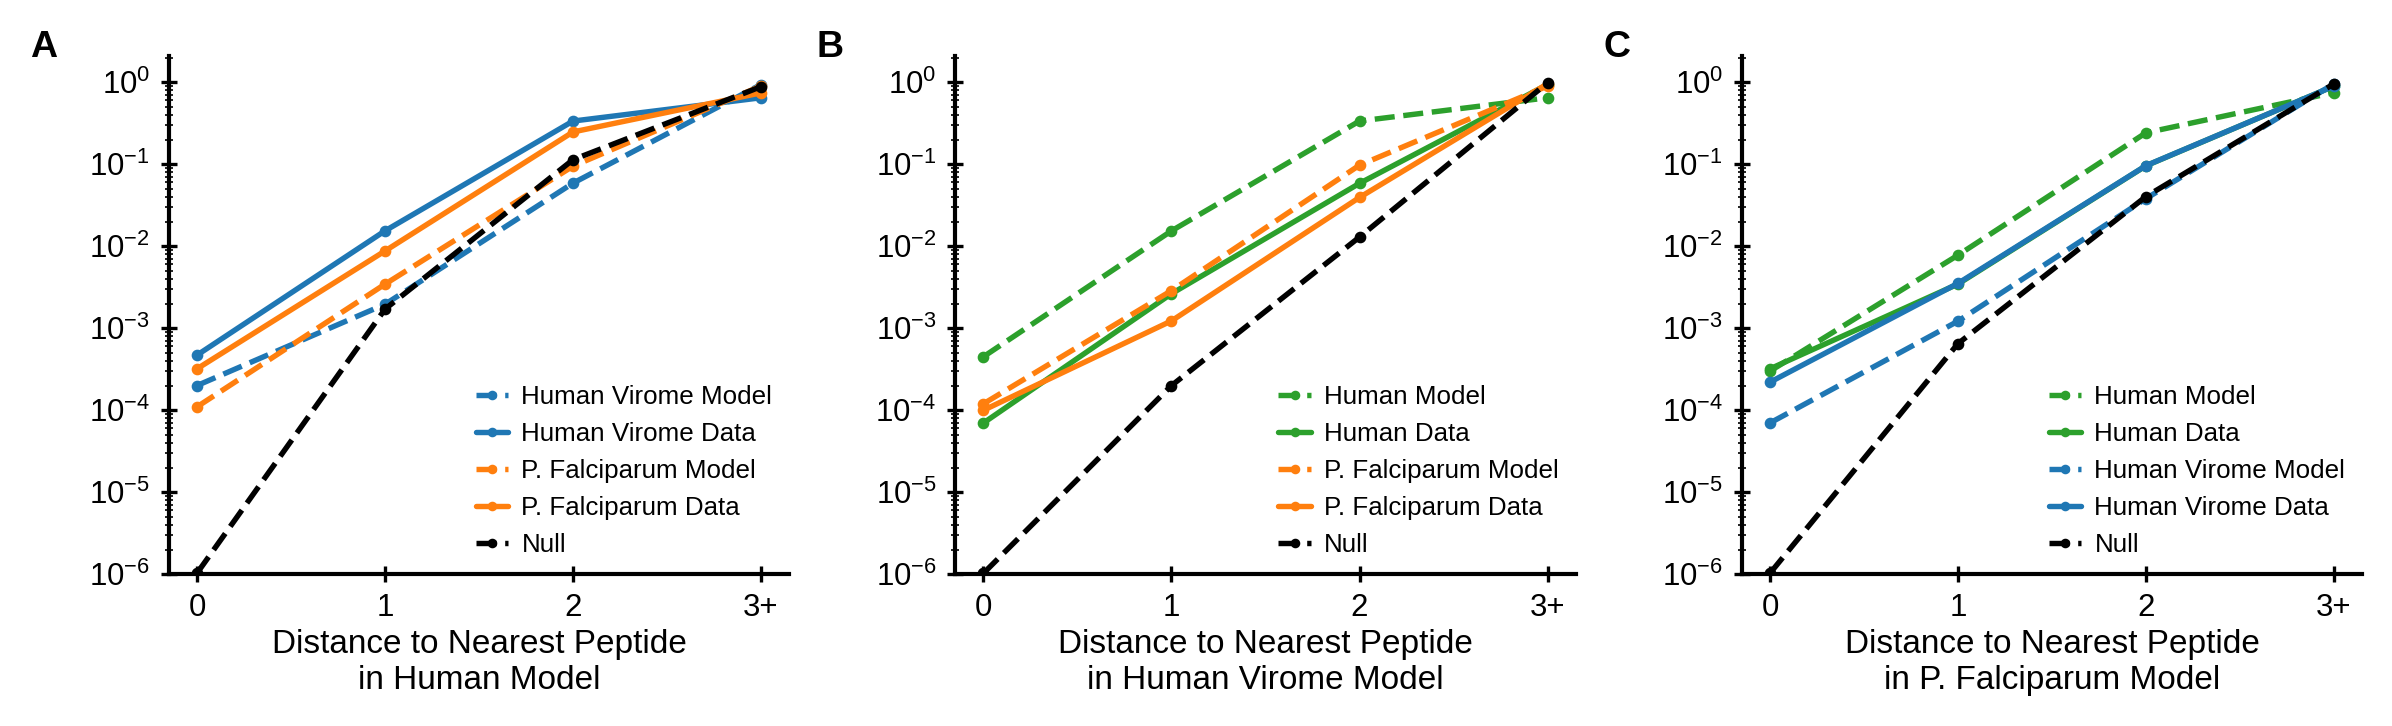

In [120]:
blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
color_map = {
    'Humanviruses_nskewfcov': blue,
    'Humanviruses_train': blue,
    'Malaria_nskewfcov': orange,
    'Malaria_train': orange,
    'Human_nskewfcov': green,
    'Human_train': green,
    'uniform': 'black'
    
}

label_map = {
    'Humanviruses_nskewfcov': 'Human Virome Model',
    'Humanviruses_train': 'Human Virome Data',
    'Malaria_nskewfcov': 'P. Falciparum Model',
    'Malaria_train': 'P. Falciparum Data',
    'Human_nskewfcov': 'Human Model',
    'Human_train': 'Human Data',
    'uniform': 'Null'
}

fig, axgrid = plt.subplots(figsize=(8,2.5),nrows=1,ncols=3,sharex=True)
for i, reference_model in enumerate(models):
        top_ax = axgrid[i]
        bottom_ax = axgrid[i]
        for sample_model in sorted(results[reference_model]):
            
            linestyle = 'dashed' if 'train' not in sample_model else 'solid'
            
            ps = np.array(results[reference_model][sample_model]).astype(float)
            top_ax.plot(range(4), ps, marker='o',color=color_map[sample_model],
                        linestyle=linestyle,markersize=2,label=label_map[sample_model])
            top_ax.set_xticks([])
            bottom_ax.set_xticks([0, 1, 2, 3])
            bottom_ax.set_xticklabels([0, 1, 2, '3+'])
            bottom_ax.set_xlabel(f'Distance to Nearest Peptide\nin {label_map[reference_model]}',fontsize=8)
            top_ax.set_ylim(1e-6, 2.1)
            top_ax.set_yticks(10**np.arange(-5.0, 1.0, 1.0))
            top_ax.set_yscale('log')
            top_ax.legend()
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
        

In [60]:
ps

[np.float64(0.00012), np.float64(0.00288), np.float64(0.09749), '0.89951']

In [27]:
models

['Humanviruses_independent',
 'Humanviruses_ncov',
 'Humanviruses_nskew',
 'Humanviruses_nskewfcov',
 'Humanviruses_train',
 'Malaria_independent',
 'Malaria_ncov',
 'Malaria_nskew',
 'Malaria_nskewfcov',
 'Malaria_train',
 'Malaria_test',
 'Mouse_train']

In [33]:
# size estimates


for model in models:
    if 'train' not in model:
        continue
    print(model)
    df = pd.read_csv(f'{datadir}/{model}_distance_to_self.csv',names=['0', '1', '2', '3+'])
    print(sum(np.array(df.loc['N'].values).astype(float)))
    df = pd.read_csv(f'{datadir}/{model}_distance_to_self_no_sampling.csv',names=['0', '1', '2', '3+'])
    print(sum(np.array(df.loc['N'].values).astype(float)))
    

Humanviruses_train
100000.0
526274.0
Malaria_train
100000.0
1990342.0
Mouse_train
100000.0
5520967.0


In [52]:
human

'/lila/data/lareauc/levinej/pep/peptidome/data/UP000005640Human.fasta.gz'

In [44]:
h = count_kmers_proteome(human, 9, clean=False)

In [46]:
len(h)

10409623

In [39]:
htrain = load_matrix(f'{datadir}/Human_train_k9_matrix.csv.gz')
htest = load_matrix(f'{datadir}/Human_test_k9_matrix.csv.gz')

In [47]:
len(htrain)

5418767

In [48]:
len(htest)

5312277

In [50]:
len(htrain)/len(htest)

1.0200460179316704

In [51]:
mtrain = load_matrix(f'{datadir}/Malaria_train_k9_matrix.csv.gz')
mtest = load_matrix(f'{datadir}/Malaria_test_k9_matrix.csv.gz')

In [53]:
m = count_kmers_proteome('/lila/data/lareauc/levinej/pep/peptidome/data/UP000001450Malaria.fasta.gz', 9, clean=False)

In [54]:
len(m)

3811441

In [55]:
len(mtrain)

1990342

In [56]:
len(mtest)

1909443

In [63]:
p=10e-2
np.sqrt(p*(1-p)/len(mtest))

np.float64(0.00021710404016571843)

In [64]:
vtrain = load_matrix(f'{datadir}/Humanviruses_train_k9_matrix.csv.gz')
vtest = load_matrix(f'{datadir}/Humanviruses_test_k9_matrix.csv.gz')

In [65]:
len(vtrain)

526274

In [66]:
len(vtest)

543879

In [68]:
len(mtest)/len(vtest)

3.510786406535277

In [70]:
len(htest)/len(mtest)

2.7821081854760785

In [71]:
len(htest)/len(vtest)

9.767387599079942

In [82]:
models = [
    'Human_train',
    'Malaria_train',
    'Mouse_train',
    'Chicken_train',
    'Zebrafish_train',
    'Humanviruses_train',
    'Malaria_train',
    'Tuberculosis_train',
    'Listeria_train',
    'StrepA_train']
for model in models:
    print(model.split("_")[0])
    print('{:.0e}'.format(2*len(load_matrix(f'{datadir}/{model}_k9_matrix.csv.gz'))))

Human
1e+07
Malaria
4e+06
Mouse
1e+07
Chicken
9e+06
Zebrafish
1e+07
Humanviruses
1e+06
Malaria
4e+06
Tuberculosis
1e+06
Listeria
8e+05
StrepA
5e+05


In [3]:
fasta_dir = '../../../data/'
for fasta in [
        'human-viruses-uniref90-filtered.fasta',
        'UP000000589Mouse.fasta.gz',
        'UP000001450Malaria.fasta.gz',
        'UP000000437Zebrafish.fasta.gz',
        'UP000000750StrepA.fasta',
        'UP000001584Tuberculosis.fasta',
        'UP000000539Chicken.fasta.gz',
        'UP000000817Listeria.fasta',
        'UP000005640Human.fasta.gz'
    ]:
    counts = count_kmers_proteome(os.path.join(fasta_dir, fasta),9)
    uniqueL = len(counts)
    L = sum(counts.values())
    print(fasta.split(".")[0])
    print('{:.0e}'.format(uniqueL))
    print('{:.0e}'.format(L))
    print('------------------')
    

human-viruses-uniref90-filtered
1e+06
1e+06
------------------
UP000000589Mouse
1e+07
1e+07
------------------
UP000001450Malaria
4e+06
4e+06
------------------
UP000000437Zebrafish
1e+07
1e+07
------------------
UP000000750StrepA
5e+05
5e+05
------------------
UP000001584Tuberculosis
1e+06
1e+06
------------------
UP000000539Chicken
9e+06
1e+07
------------------
UP000000817Listeria
8e+05
8e+05
------------------
UP000005640Human
1e+07
1e+07
------------------
